## This notebook allows visualizing the different DEGs from DESeq2 and analysing their effect for Lung data

In [139]:
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score,  silhouette_samples
import random

## Load Data

In [62]:
input_file = "DESeq2Local/DESeq2Input/subsetted_lung_counts_ml_model.csv"
sample_clinical_file = "Datasets/DESeq2Input/lungSampleToClinicalFeatures.csv"
sample_clinical = pd.read_csv(sample_clinical_file)

In [63]:
df = pd.read_csv(input_file)
df.index = df['gene_id']
df = df.drop('gene_id', axis = 1)

In [64]:
df

5faf8a12-a2aa-44f1-b099-02106766ec94  \
gene_id                                                    
ENSG00000000003.15                                1317.0   
ENSG00000000005.6                                    1.0   
ENSG00000000419.13                                2172.0   
ENSG00000000457.14                                 738.0   
ENSG00000000460.17                                 426.0   
...                                                  ...   
ENSG00000288637.1                                    0.0   
ENSG00000288658.1                                   26.0   
ENSG00000288669.1                                    1.0   
ENSG00000288674.1                                    7.0   
ENSG00000288675.1                                   10.0   

                    6855a406-c085-45c7-b789-981786f0c775  \
gene_id                                                    
ENSG00000000003.15                                7434.0   
ENSG00000000005.6                                    0.0   
ENSG00000000419.13                                2968.0   
ENSG00000000457.14                                 555.0   
ENSG00000000460.17                                 643.0   
...                                                  ...   
ENSG00000288637.1                                    0.0   
ENSG00000288658.1                                   36.0   
ENSG00000288669.1                                    0.0   
ENSG00000288674.1                                    4.0   
ENSG00000288675.1                                   17.0   

                    e2445ad6-2a6a-4ec3-84d8-93cc3c180a58  \
gene_id                                                    
ENSG00000000003.15                                3037.0   
ENSG00000000005.6                                    0.0   
ENSG00000000419.13                                3243.0   
ENSG00000000457.14                                 499.0   
ENSG00000000460.17                                 980.0   
...                                                  ...   
ENSG00000288637.1                                    0.0   
ENSG00000288658.1                                  308.0   
ENSG00000288669.1                                    0.0   
ENSG00000288674.1                                    2.0   
ENSG00000288675.1                                   19.0   

                    4b167e70-e4e6-47f7-9fe9-11cf20f0d442  \
gene_id                                                    
ENSG00000000003.15                                2538.0   
ENSG00000000005.6                                    0.0   
ENSG00000000419.13                                1816.0   
ENSG00000000457.14                                 545.0   
ENSG00000000460.17                                 488.0   
...                                                  ...   
ENSG00000288637.1                                    0.0   
ENSG00000288658.1                                    1.0   
ENSG00000288669.1                                    0.0   
ENSG00000288674.1                                    3.0   
ENSG00000288675.1                                   19.0   

                    470afda8-c4a4-4161-b6e7-1f0d2372d2c7  \
gene_id                                                    
ENSG00000000003.15                                1521.0   
ENSG00000000005.6                                    0.0   
ENSG00000000419.13                                2693.0   
ENSG00000000457.14                                 244.0   
ENSG00000000460.17                                 168.0   
...                                                  ...   
ENSG00000288637.1                                    0.0   
ENSG00000288658.1                                   19.0   
ENSG00000288669.1                                    3.0   
ENSG00000288674.1                                    2.0   
ENSG00000288675.1                                    8.0   

                    51054c11-8e2f-4f52-bdaf-ebb515508a28  \
gene_id                                                

In [67]:
sample_clinical.index = sample_clinical["Unnamed: 0"]
sample_clinical = sample_clinical.drop("Unnamed: 0", axis = 1)

In [68]:
sample_subset = list(df.columns)
sample_clinical = sample_clinical.loc[sample_subset]

In [69]:
sample_clinical.shape

(894, 9)

In [70]:
def plot_silhouette(sil_df):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=sil_df, x='label', y='silhouette', hue='label', palette='Set2', legend=False)
    plt.axhline(0, linestyle='--', color='gray')
    plt.title("Silhouette scores by condition/subtype")
    plt.ylabel("Silhouette value")
    plt.xlabel("Label")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Gene Subsets and Visualizations

In [333]:
base_dir = Path("DESeq2Local/results/DiseaseType_Subset_Lung/CancerToNormal")
all_cancer_to_normal_sig_genes = set()

In [334]:
for subfolder in base_dir.iterdir():
    if subfolder.is_dir():
        sig_file = subfolder / "sig_genes.csv"
        if sig_file.exists():
            df_genes = pd.read_csv(sig_file, index_col=0)  # assuming gene names are rownames
            print(len(df_genes))
            all_cancer_to_normal_sig_genes.update(df_genes.index.tolist())


7203
5491


In [328]:
len(all_cancer_to_normal_sig_genes)

9102

In [335]:
base_dir = Path("DESeq2Local/results/DiseaseType_Subset_Lung/CancerSTtoST")
all_cancer_to_cancer_sig_genes = set()

In [336]:
for subfolder in base_dir.iterdir():
    if subfolder.is_dir():
        sig_file = subfolder / "sig_genes.csv"
        if sig_file.exists():
            df_genes = pd.read_csv(sig_file, index_col=0)  # assuming gene names are rownames
            print(len(df_genes))
            all_cancer_to_cancer_sig_genes.update(df_genes.index.tolist())


3518


In [77]:
len(all_cancer_to_cancer_sig_genes)

3518

In [78]:
intersection_sig_genes = all_cancer_to_normal_sig_genes.intersection(all_cancer_to_cancer_sig_genes)
len(intersection_sig_genes)

3149

In [79]:
union_sig_genes = all_cancer_to_normal_sig_genes.union(all_cancer_to_cancer_sig_genes)
len(union_sig_genes)

8633

In [80]:
columns_to_group_dict = {
    'Gender' : 'demographic.gender',
    'Age': 'demographic.age_at_index',
    'Race': 'demographic.race',
    'Disease Type' : 'cases.disease_type',
    # 'Pathologic Stage': 'diagnoses.ajcc_pathologic_stage',
    # 'Classification of Tumor' :'diagnoses.classification_of_tumor',
    # 'Primary Diagnosis': 'diagnoses.primary_diagnosis',
}

In [276]:
def save_pca_plot(pca_df, explained, hue, title, filename, save = True):
    plt.figure(figsize=(8, 6))
    scatter = sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=hue, palette='Set2', s=60)
    plt.xlabel(f"PC1 ({explained[0]*100:.1f}% var)")
    plt.ylabel(f"PC2 ({explained[1]*100:.1f}% var)")
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    box = scatter.get_position()
    scatter.set_position([box.x0, box.y0, box.width * 0.8, box.height])  # Shrink plot
    plt.legend(
        title='Categories',
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        borderaxespad=0.,
        ncol=2,  # Two-column legend
        fontsize='small',
        title_fontsize='medium'
    )
    if save: 
        plt.savefig(filename, dpi=300)
    plt.show()
    plt.close()

## All genes

In [82]:
df_for_pca = df.T
log_norm_df = np.log2(df_for_pca + 1)

In [83]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(log_norm_df)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
for key in columns_to_group_dict:
    pca_df[key] = list(sample_clinical[columns_to_group_dict[key]])

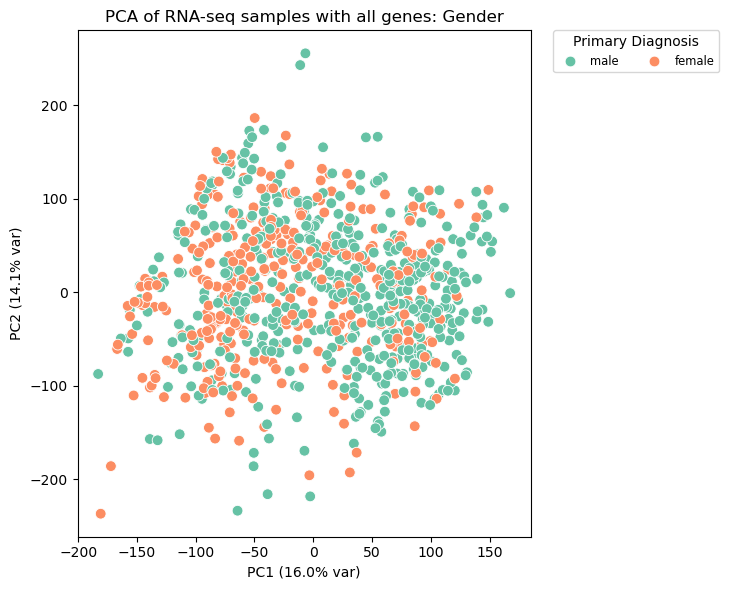

/var/folders/c4/570ty6gd42v42mmcqq8z2mrc0000gn/T/ipykernel_47294/761855078.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


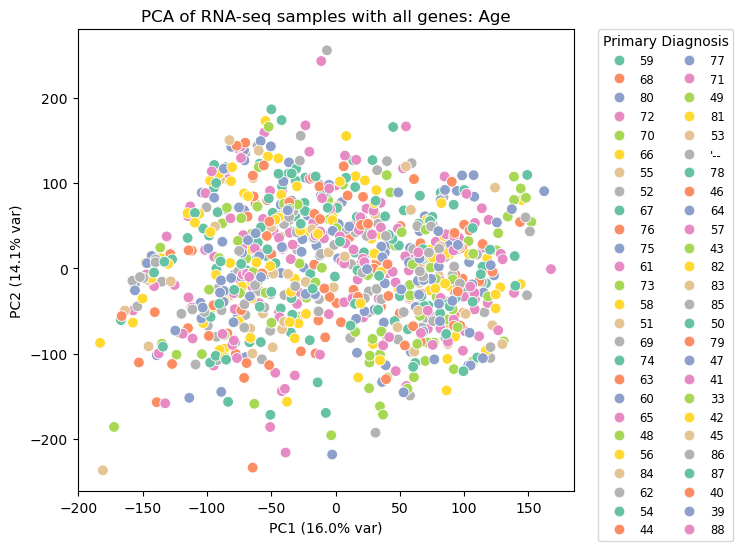

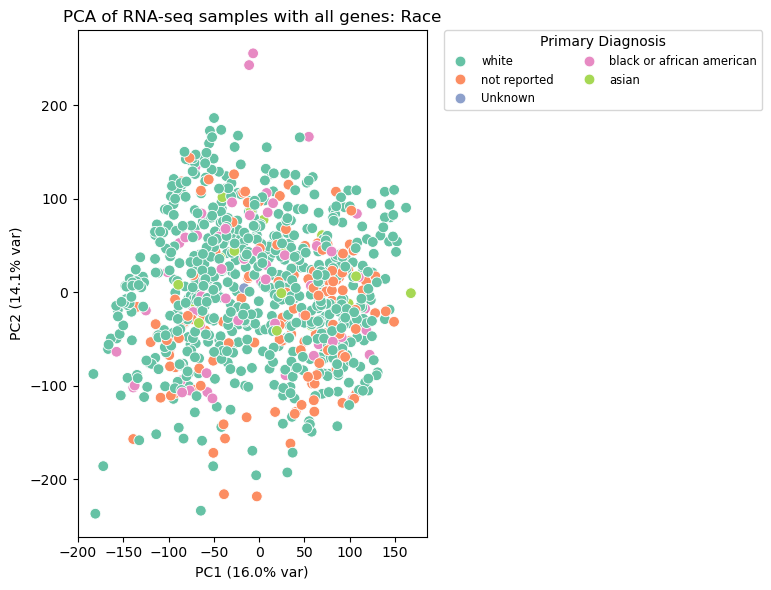

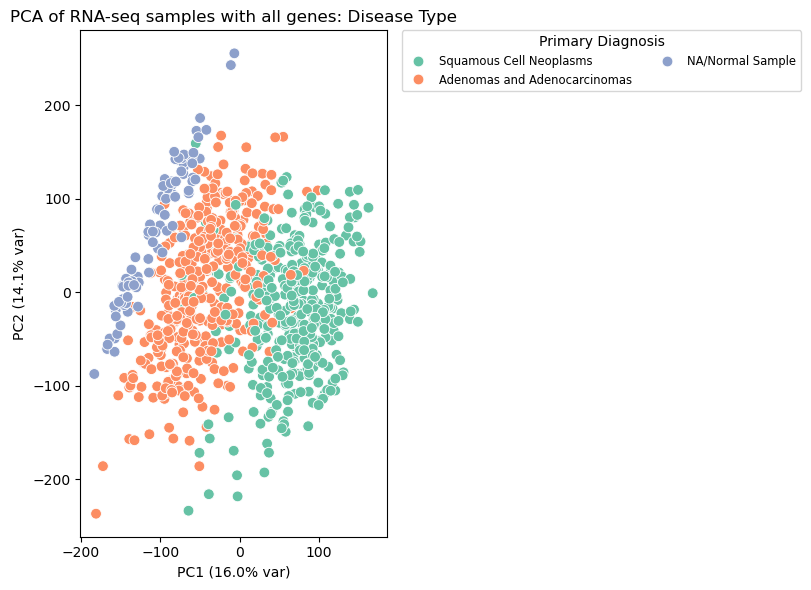

In [84]:
for key in columns_to_group_dict:
    save_pca_plot(pca_df, pca.explained_variance_ratio_, key,f"PCA of RNA-seq samples with all genes: {key}", f"pca_{columns_to_group_dict[key].replace(' ', '_')}.png", save = True)

In [85]:
X = PCA(n_components=10).fit_transform(log_norm_df)
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]]
    score = silhouette_score(X, labels)
    print(f"Silhouette Score of Labelling {key}: {score:.3f}")

Silhouette Score of Labelling Gender: 0.027
Silhouette Score of Labelling Age: -0.286
Silhouette Score of Labelling Race: -0.182
Silhouette Score of Labelling Disease Type: 0.209


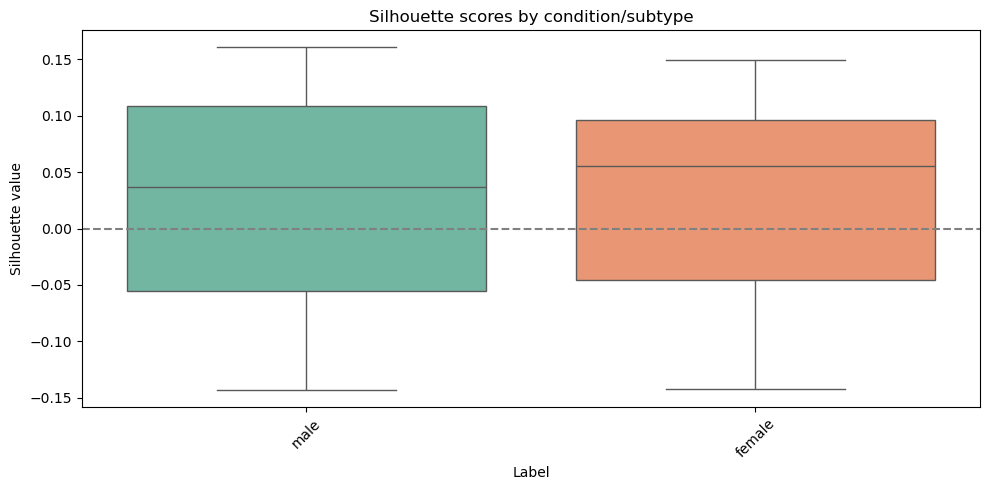

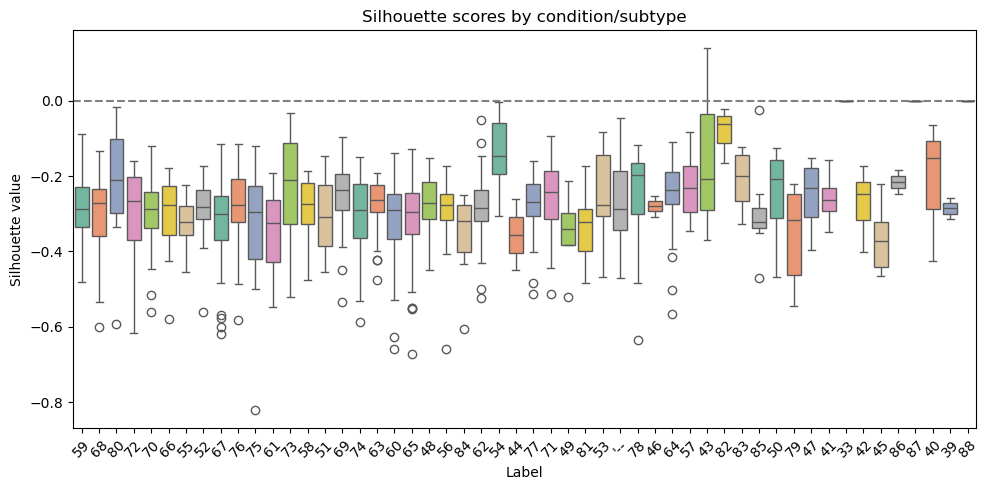

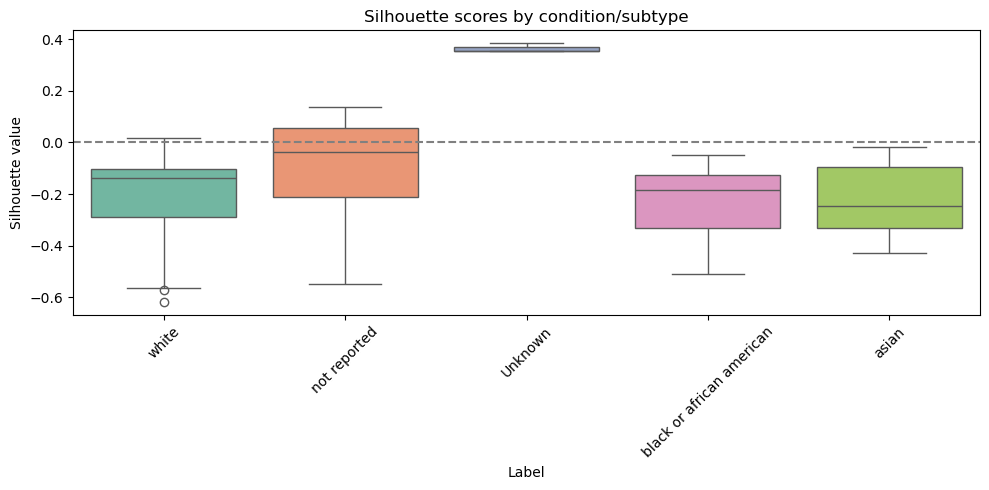

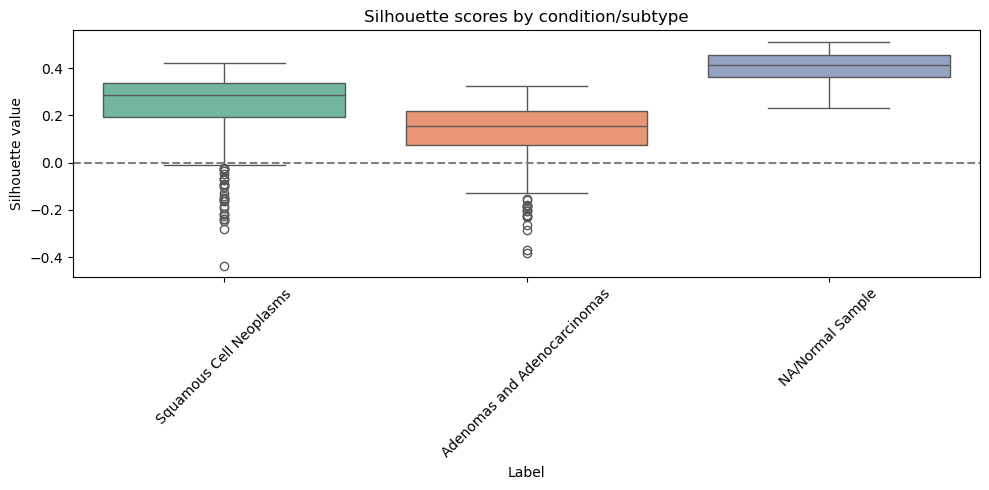

In [86]:
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]] 
    sil_values = silhouette_samples(X, labels)
    sil_df = pd.DataFrame({
    'silhouette': sil_values,
    'label': labels.values
    })
    plot_silhouette(sil_df)

## All genes DE from normal samples

In [195]:
with open('Datasets/LungSigGenes/cancer_to_normal_comparison_sig_genes.txt', 'w') as f:
    for item in list(all_cancer_to_normal_sig_genes):
        f.write(f"{item}\n")

In [87]:
df_cancer_to_normal = df.loc[list(all_cancer_to_normal_sig_genes)].copy()

In [88]:
df_for_pca = df_cancer_to_normal.T
log_norm_df = np.log2(df_for_pca + 1)

In [89]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(log_norm_df)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
for key in columns_to_group_dict:
    pca_df[key] = list(sample_clinical[columns_to_group_dict[key]])

In [90]:
pca_df

PC1         PC2  Gender Age                       Race  \
0    -45.992095   35.615270    male  59                      white   
1     -7.553713    0.548318    male  68                      white   
2     98.773027    2.108054  female  80                      white   
3     41.143027  -28.190223  female  72                      white   
4     71.880219  -50.679425    male  70                      white   
..          ...         ...     ...  ..                        ...   
889 -115.901519   82.218057  female  58                      white   
890 -119.179721  -10.592978  female  59                      white   
891 -107.808390  182.025053    male  52  black or african american   
892 -129.062077  -30.616159  female  75                      white   
893 -121.178879   29.050633    male  60                      white   

                     Disease Type  
0         Squamous Cell Neoplasms  
1    Adenomas and Adenocarcinomas  
2         Squamous Cell Neoplasms  
3         Squamous Cell Neoplasms  
4         Squamous Cell Neoplasms  
..                            ...  
889              NA/Normal Sample  
890              NA/Normal Sample  
891              NA/Normal Sample  
892              NA/Normal Sample  
893              NA/Normal Sample  

[894 rows x 6 columns]

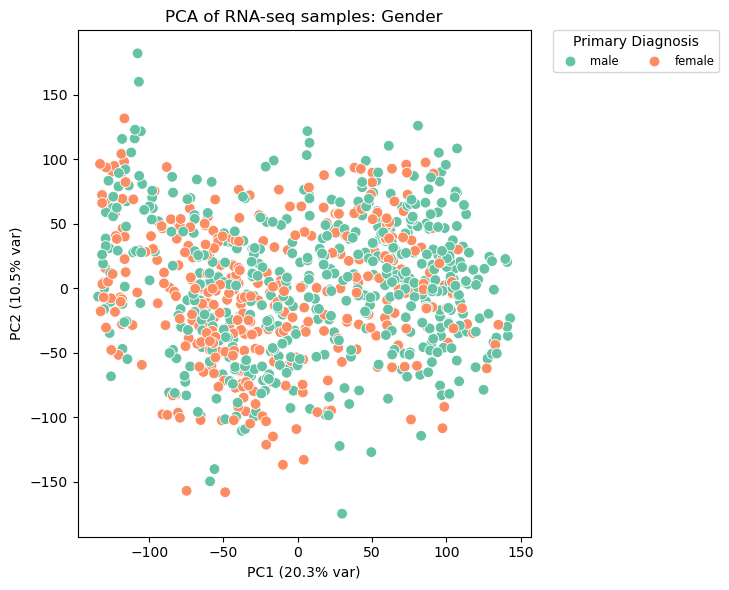

/var/folders/c4/570ty6gd42v42mmcqq8z2mrc0000gn/T/ipykernel_47294/761855078.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


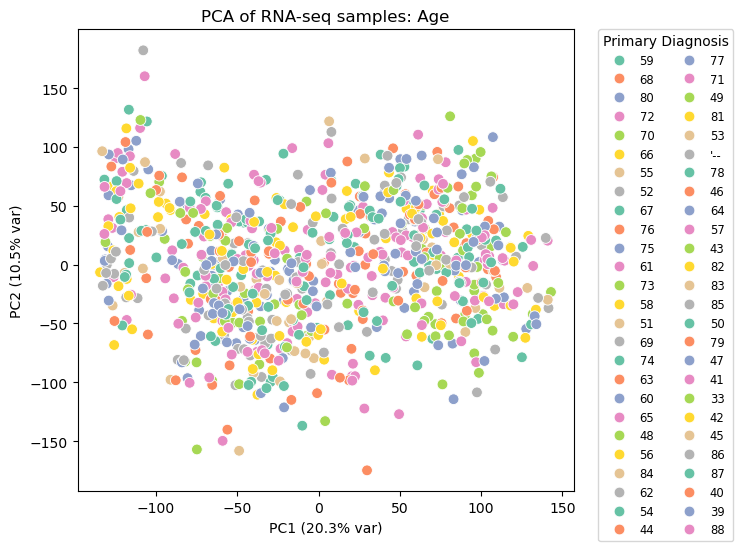

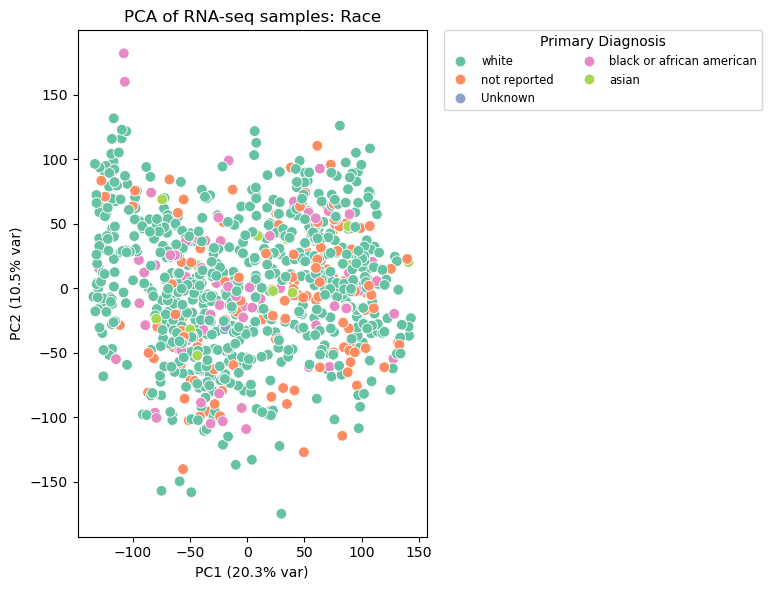

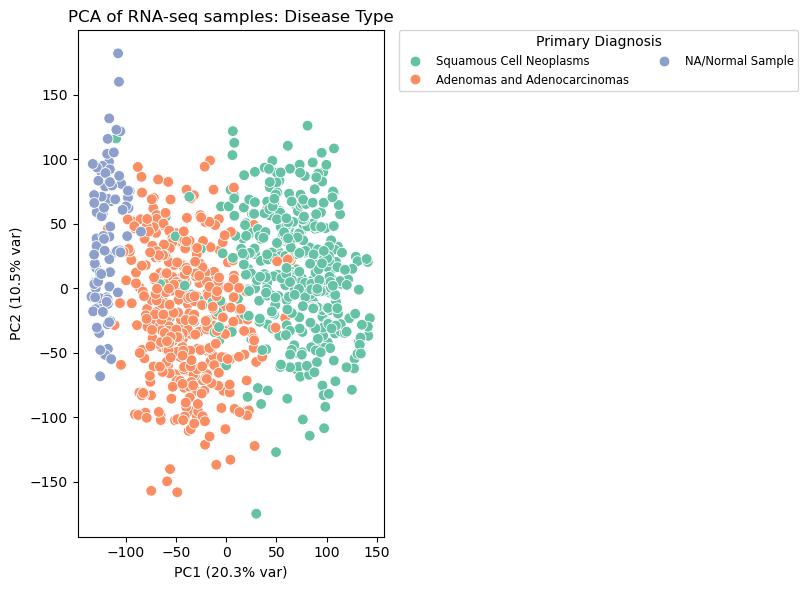

In [91]:
for key in columns_to_group_dict:
    save_pca_plot(pca_df, pca.explained_variance_ratio_, key,f"PCA of RNA-seq samples: {key}", f"pca_{columns_to_group_dict[key].replace(' ', '_')}.png", save = True)

In [92]:

X = PCA(n_components=10).fit_transform(log_norm_df)
#labels = sample_conditions 
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]]
    score = silhouette_score(X, labels)
    print(f"Silhouette Score of Labelling {key}: {score:.3f}")

Silhouette Score of Labelling Gender: 0.027
Silhouette Score of Labelling Age: -0.294
Silhouette Score of Labelling Race: -0.186
Silhouette Score of Labelling Disease Type: 0.257


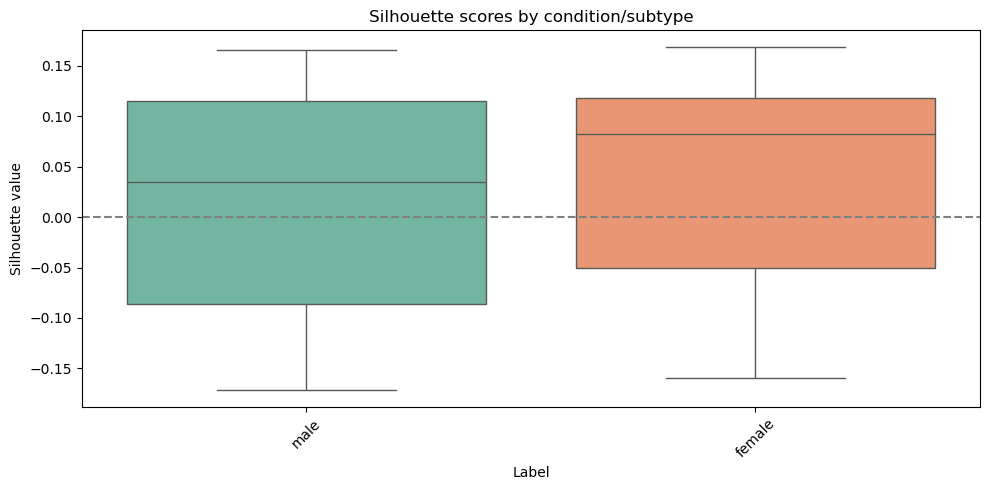

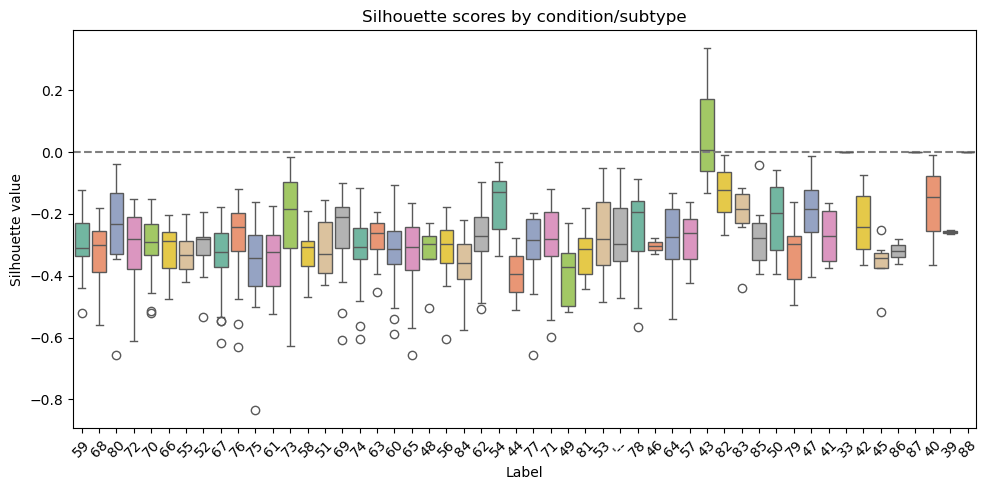

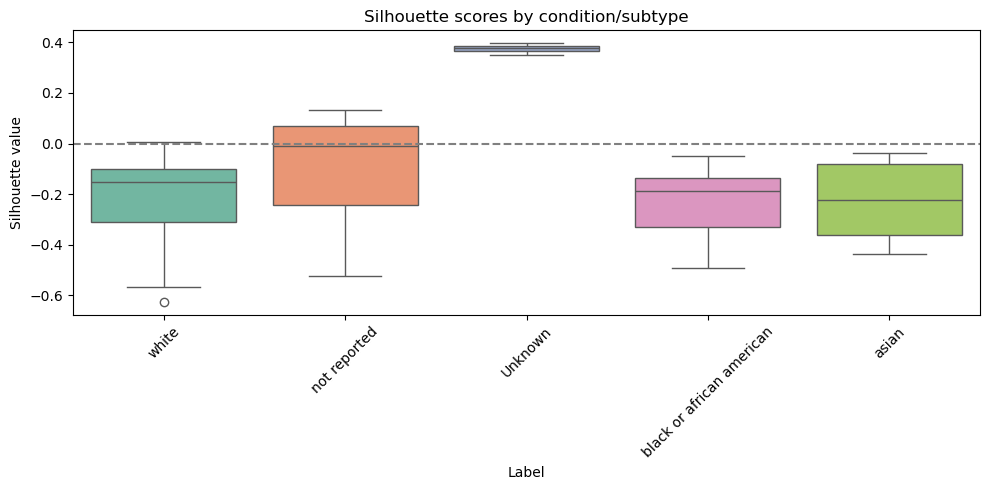

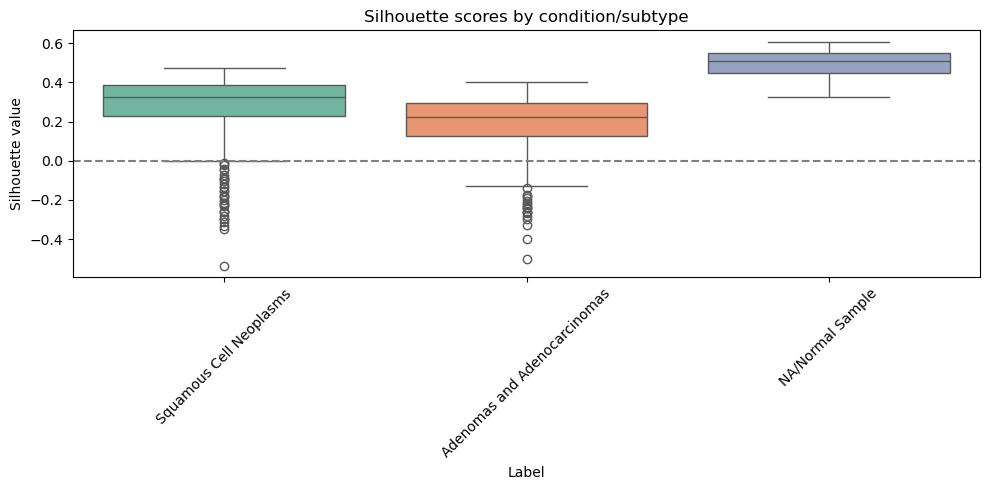

In [93]:
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]] 
    sil_values = silhouette_samples(X, labels)
    sil_df = pd.DataFrame({
    'silhouette': sil_values,
    'label': labels.values
    })
    plot_silhouette(sil_df)

## All genes DE cancer to cancer

In [196]:
with open('Datasets/LungSigGenes/cancer_to_cancer_comparison_sig_genes.txt', 'w') as f:
    for item in list(all_cancer_to_cancer_sig_genes):
        f.write(f"{item}\n")

In [94]:
df_cancer_to_cancer = df.loc[list(all_cancer_to_cancer_sig_genes)].copy()

In [95]:
df_for_pca = df_cancer_to_cancer.T
log_norm_df = np.log2(df_for_pca + 1)

In [96]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(log_norm_df)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
for key in columns_to_group_dict:
    pca_df[key] = list(sample_clinical[columns_to_group_dict[key]])

In [97]:
pca_df

PC1         PC2  Gender Age                       Race  \
0   -32.079618   23.807855    male  59                      white   
1   -16.666556  -21.705253    male  68                      white   
2    90.767907    5.111508  female  80                      white   
3    38.268019  -27.469346  female  72                      white   
4    66.759237  -47.872216    male  70                      white   
..         ...         ...     ...  ..                        ...   
889 -69.334533   66.852197  female  58                      white   
890 -74.145273    3.683256  female  59                      white   
891 -51.669035  131.457343    male  52  black or african american   
892 -76.376820  -12.115920  female  75                      white   
893 -73.226762   30.525898    male  60                      white   

                     Disease Type  
0         Squamous Cell Neoplasms  
1    Adenomas and Adenocarcinomas  
2         Squamous Cell Neoplasms  
3         Squamous Cell Neoplasms  
4         Squamous Cell Neoplasms  
..                            ...  
889              NA/Normal Sample  
890              NA/Normal Sample  
891              NA/Normal Sample  
892              NA/Normal Sample  
893              NA/Normal Sample  

[894 rows x 6 columns]

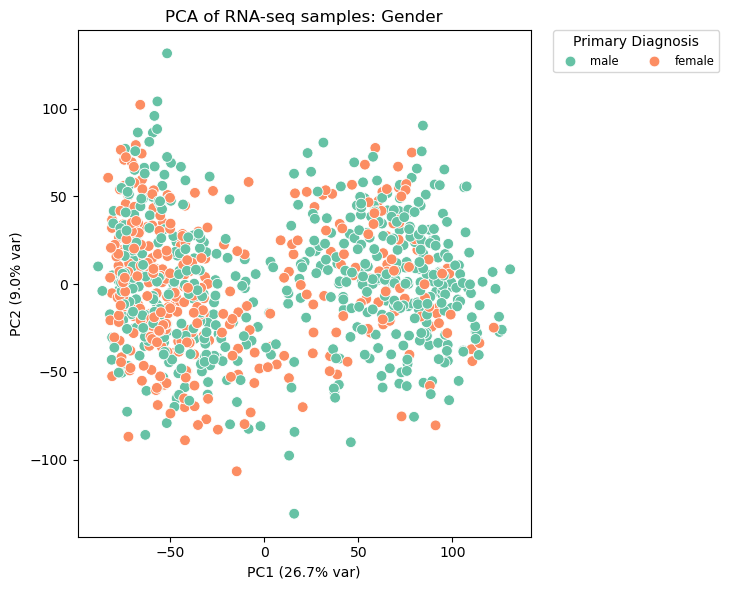

/var/folders/c4/570ty6gd42v42mmcqq8z2mrc0000gn/T/ipykernel_47294/761855078.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


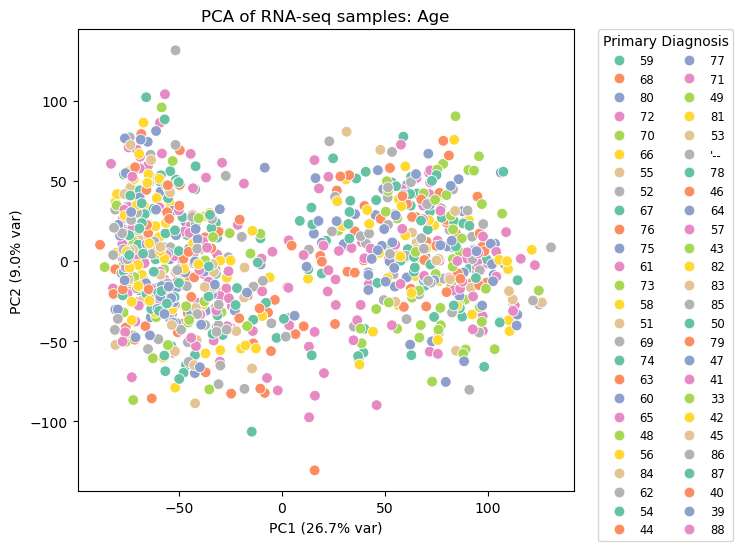

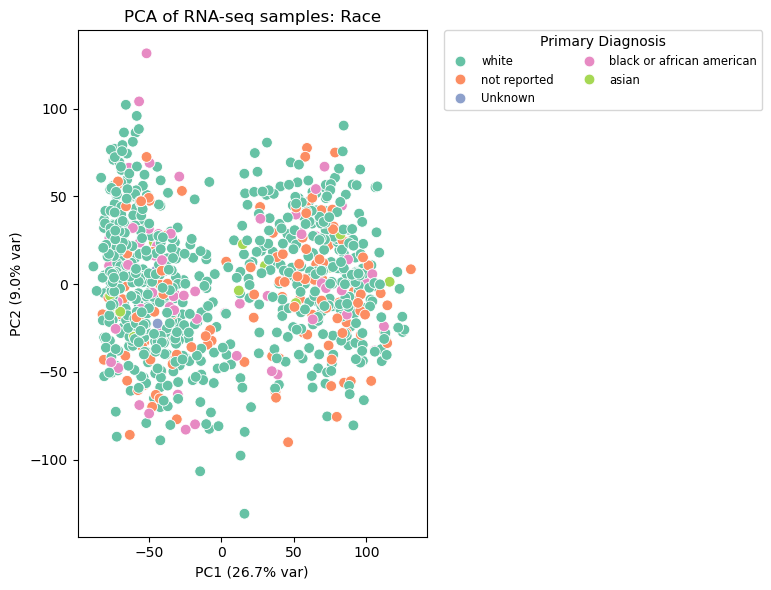

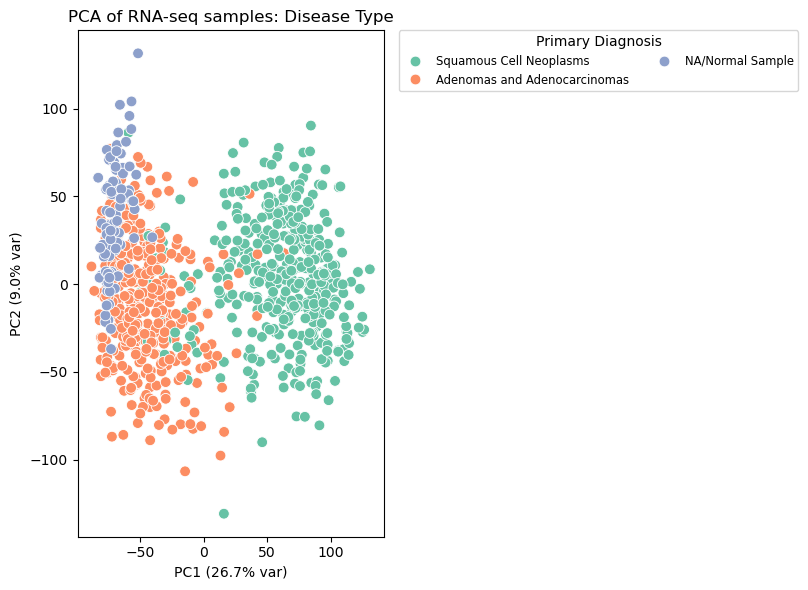

In [98]:
for key in columns_to_group_dict:
    save_pca_plot(pca_df, pca.explained_variance_ratio_, key,f"PCA of RNA-seq samples: {key}", f"pca_{columns_to_group_dict[key].replace(' ', '_')}.png", save = True)

In [99]:
X = PCA(n_components=10).fit_transform(log_norm_df)
#labels = sample_conditions 
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]]
    score = silhouette_score(X, labels)
    print(f"Silhouette Score of Labelling {key}: {score:.3f}")

Silhouette Score of Labelling Gender: 0.031
Silhouette Score of Labelling Age: -0.325
Silhouette Score of Labelling Race: -0.206
Silhouette Score of Labelling Disease Type: 0.276


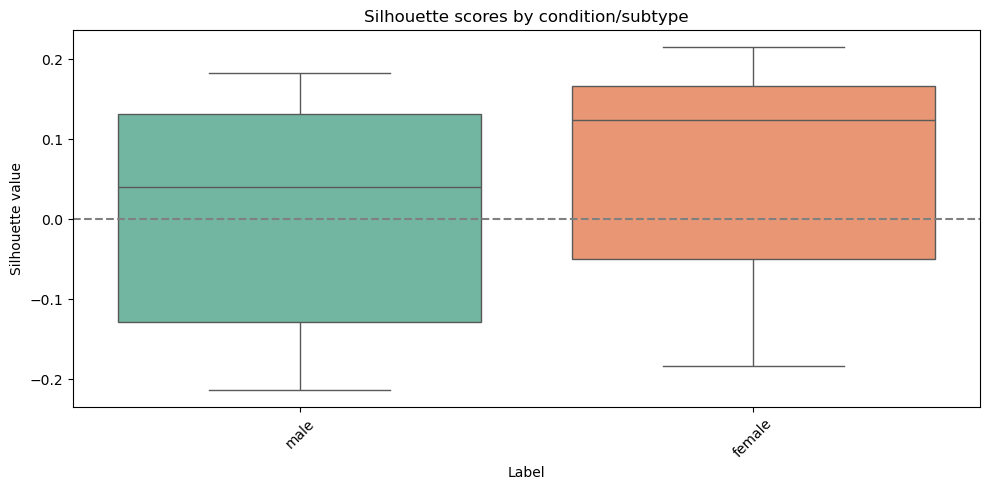

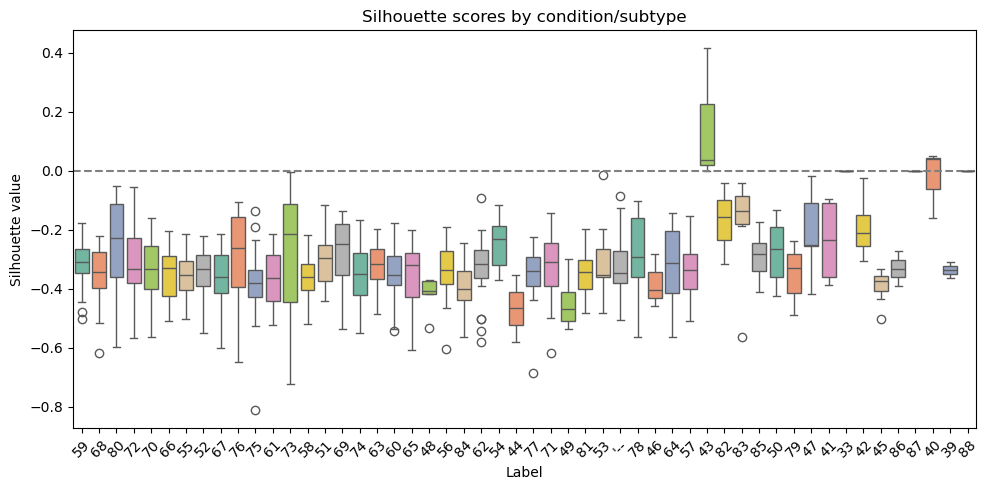

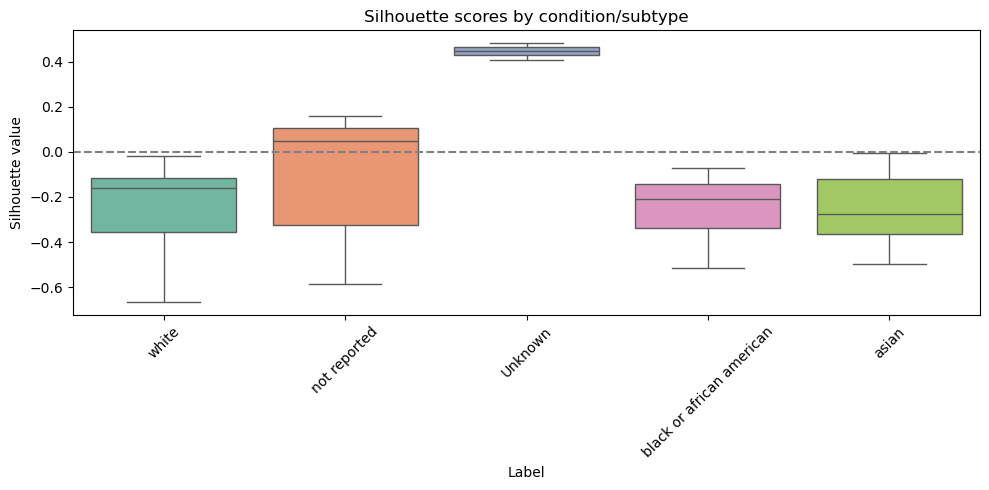

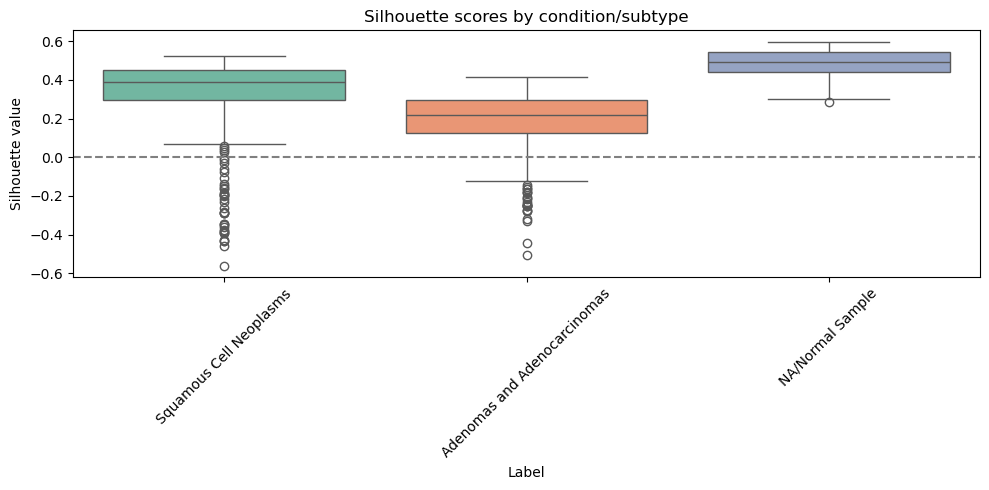

In [100]:
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]] 
    sil_values = silhouette_samples(X, labels)
    sil_df = pd.DataFrame({
    'silhouette': sil_values,
    'label': labels.values
    })
    plot_silhouette(sil_df)

## Intersection gene set

In [278]:
with open('Datasets/LungSigGenes/intersection_sig_genes.txt', 'w') as f:
    for item in list(intersection_sig_genes):
        f.write(f"{item}\n")

In [283]:
df_intersection = df.loc[list(intersection_sig_genes)].copy()


In [284]:
df_for_pca = df_intersection.T
log_norm_df = np.log2(df_for_pca + 1)

In [285]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(log_norm_df)

# Put result in a DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
for key in columns_to_group_dict:
    pca_df[key] = list(sample_clinical[columns_to_group_dict[key]])

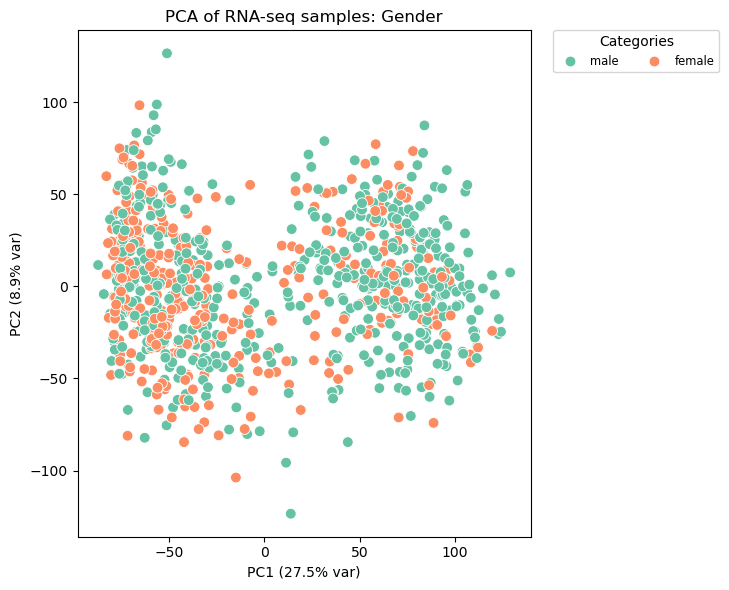

/var/folders/c4/570ty6gd42v42mmcqq8z2mrc0000gn/T/ipykernel_47294/4178465455.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


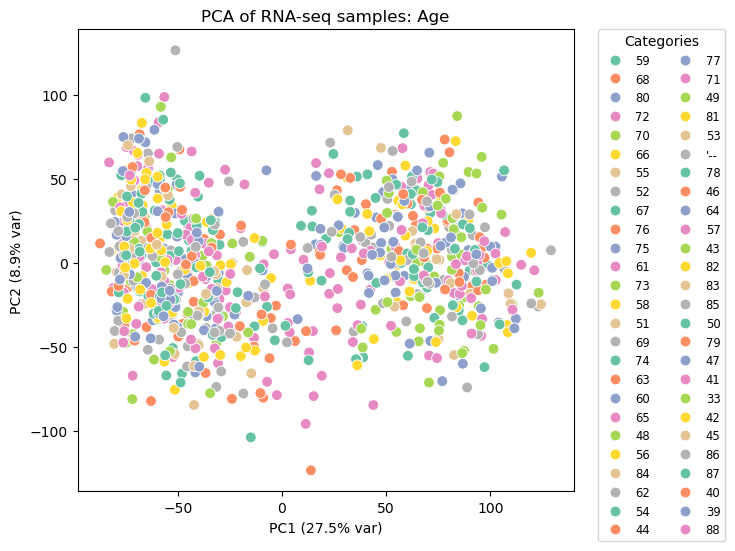

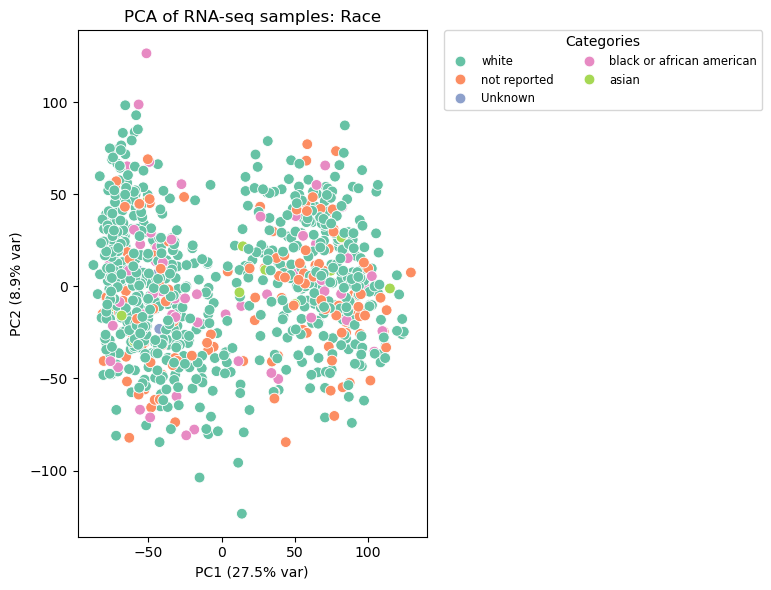

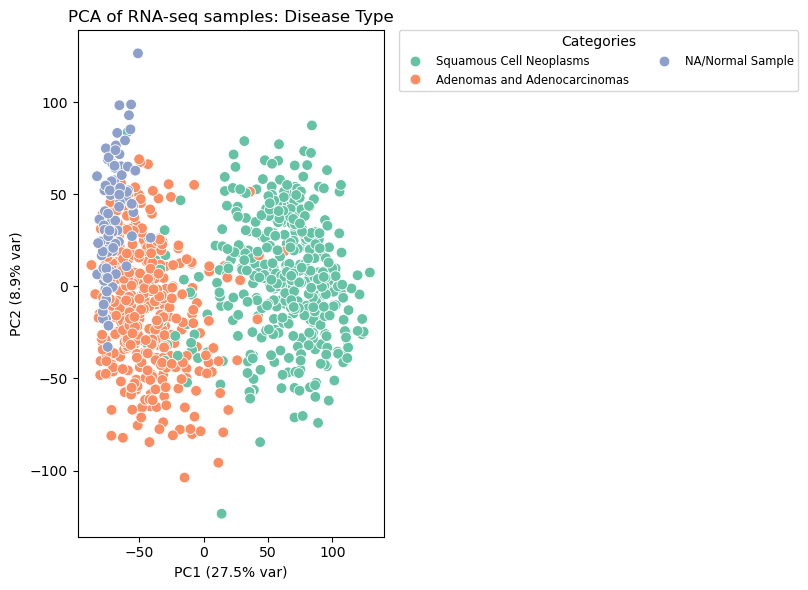

In [286]:
for key in columns_to_group_dict:
    save_pca_plot(pca_df, pca.explained_variance_ratio_, key,f"PCA of RNA-seq samples: {key}", f"pca_{columns_to_group_dict[key].replace(' ', '_')}.png", save = True)

In [105]:
X = PCA(n_components=10).fit_transform(log_norm_df)
#labels = sample_conditions 
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]]
    score = silhouette_score(X, labels)
    print(f"Silhouette Score of Labelling {key}: {score:.3f}")

Silhouette Score of Labelling Gender: 0.031
Silhouette Score of Labelling Age: -0.329
Silhouette Score of Labelling Race: -0.208
Silhouette Score of Labelling Disease Type: 0.280


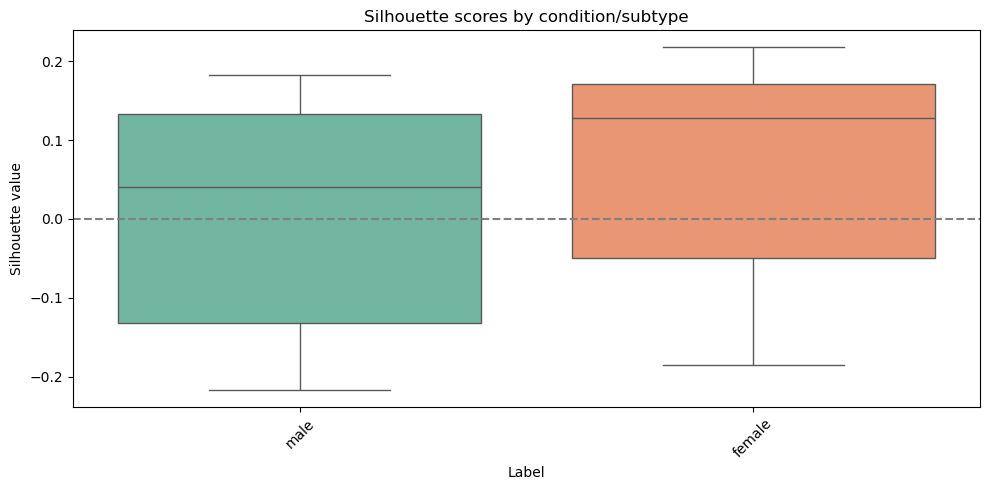

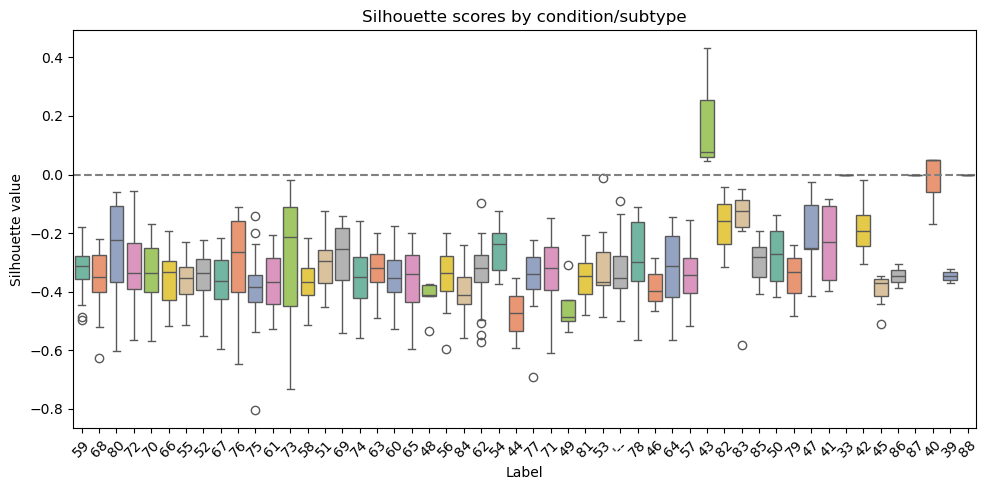

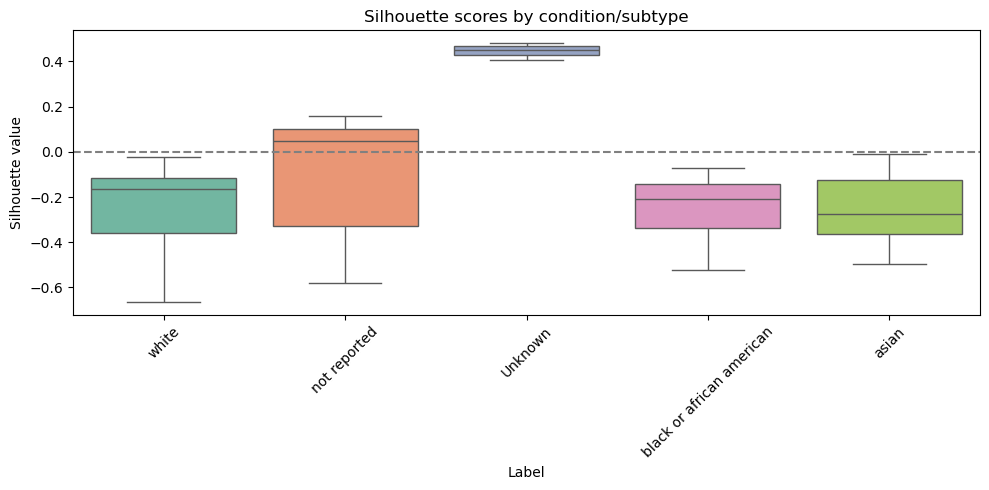

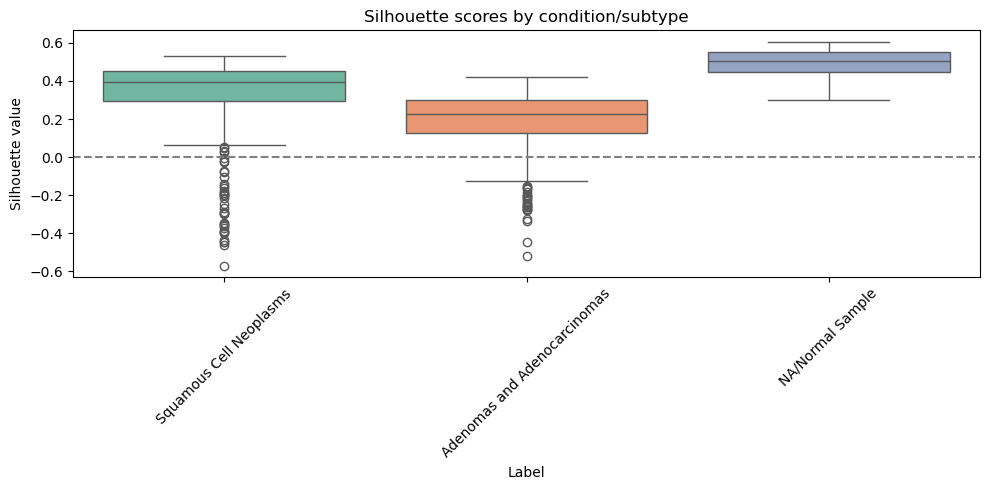

In [106]:
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]] 
    sil_values = silhouette_samples(X, labels)
    sil_df = pd.DataFrame({
    'silhouette': sil_values,
    'label': labels.values
    })
    plot_silhouette(sil_df)

## Union Gene set

In [198]:
with open('Datasets/LungSigGenes/union_sig_genes.txt', 'w') as f:
    for item in list(union_sig_genes):
        f.write(f"{item}\n")

In [107]:
df_union = df.loc[list(union_sig_genes)].copy()

In [108]:
df_for_pca = df_union.T
log_norm_df = np.log2(df_for_pca + 1)

In [109]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(log_norm_df)

# Put result in a DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
for key in columns_to_group_dict:
    pca_df[key] = list(sample_clinical[columns_to_group_dict[key]])

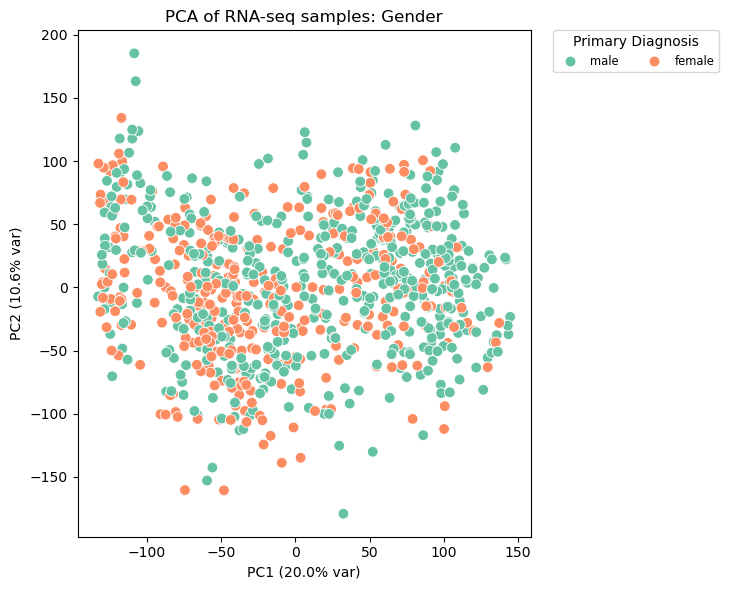

/var/folders/c4/570ty6gd42v42mmcqq8z2mrc0000gn/T/ipykernel_47294/761855078.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


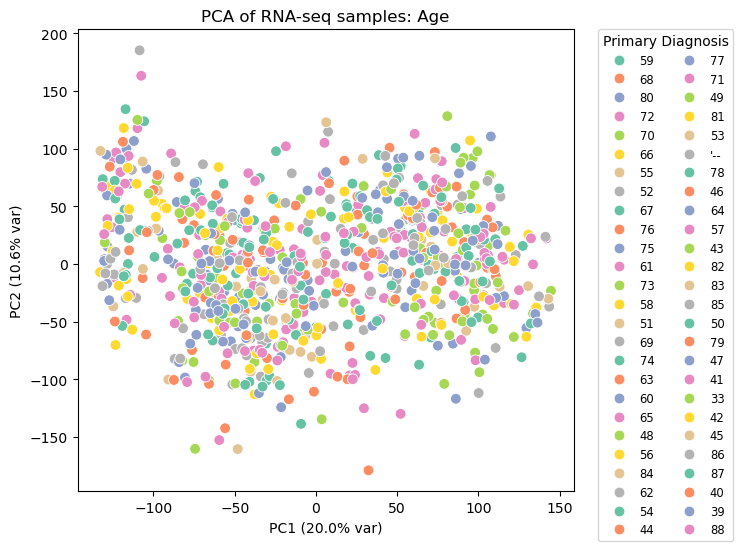

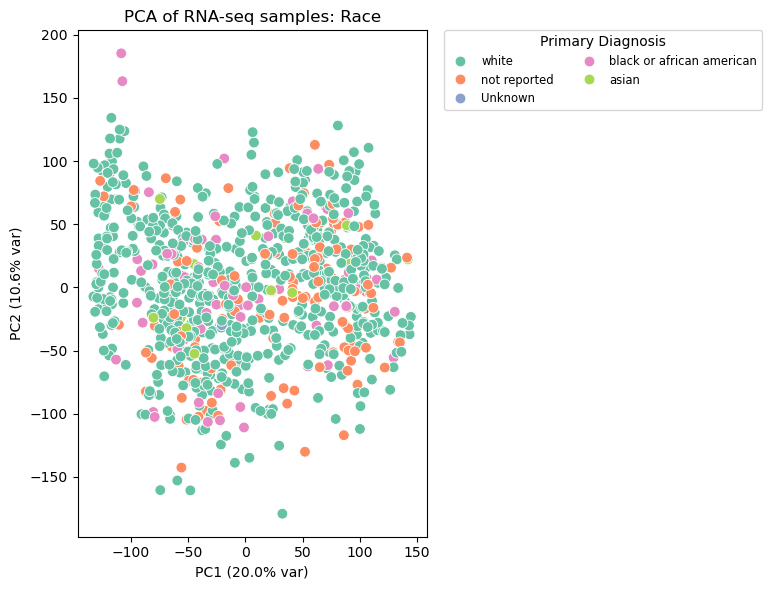

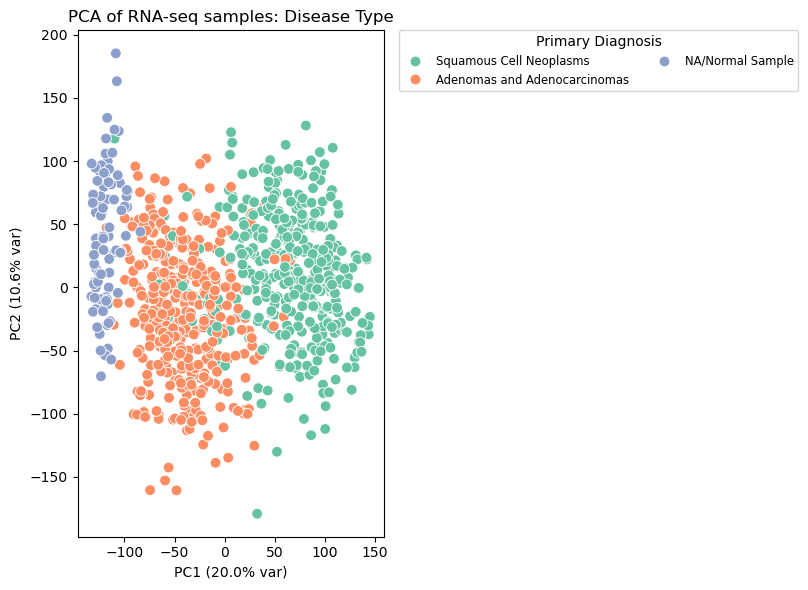

In [110]:
for key in columns_to_group_dict:
    save_pca_plot(pca_df, pca.explained_variance_ratio_, key,f"PCA of RNA-seq samples: {key}", f"pca_{columns_to_group_dict[key].replace(' ', '_')}.png", save = True)

In [111]:
X = PCA(n_components=10).fit_transform(log_norm_df)
#labels = sample_conditions 
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]]
    score = silhouette_score(X, labels)
    print(f"Silhouette Score of Labelling {key}: {score:.3f}")

Silhouette Score of Labelling Gender: 0.027
Silhouette Score of Labelling Age: -0.293
Silhouette Score of Labelling Race: -0.185
Silhouette Score of Labelling Disease Type: 0.256


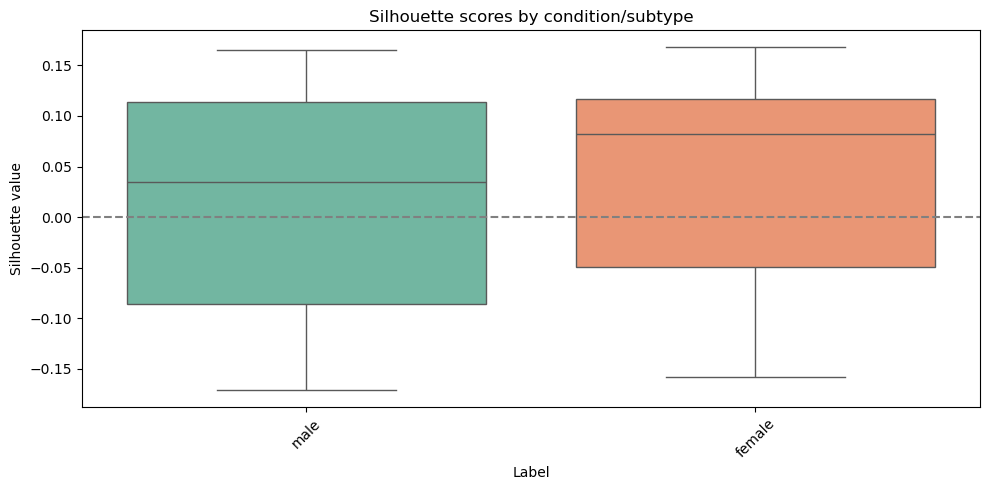

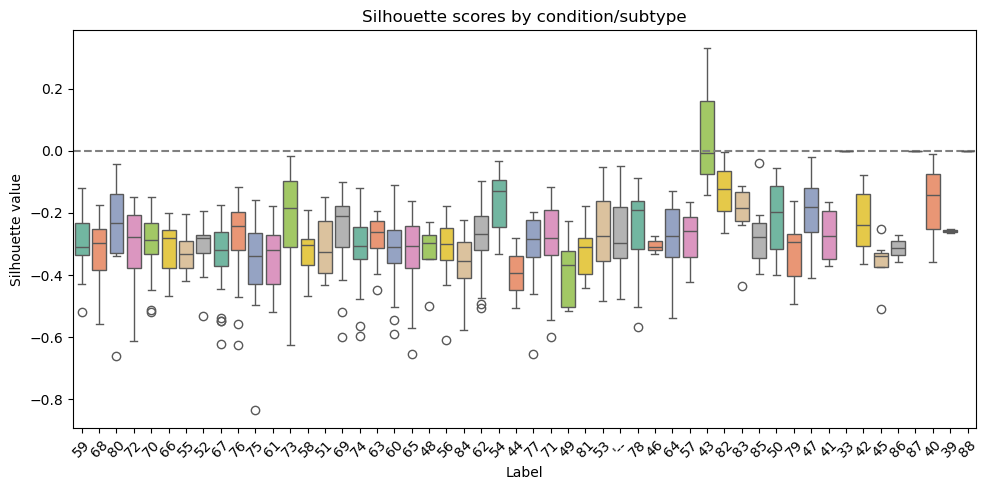

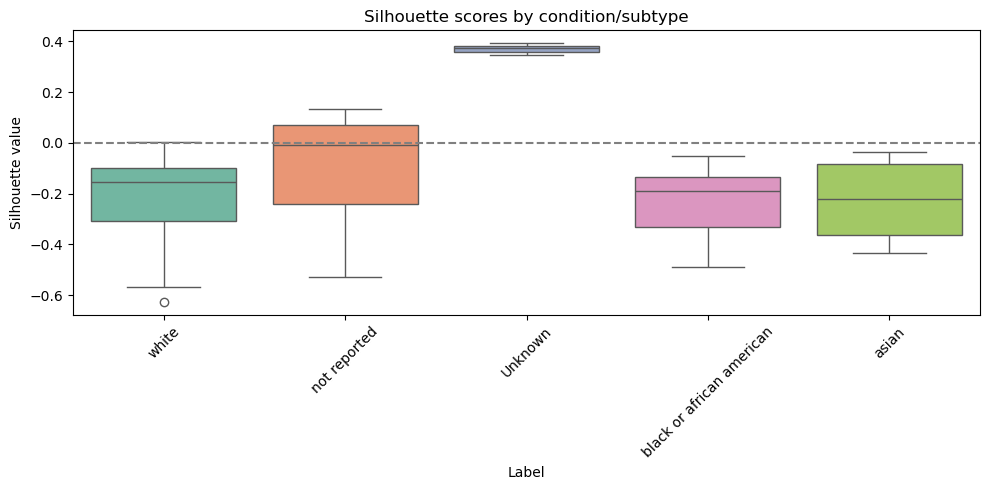

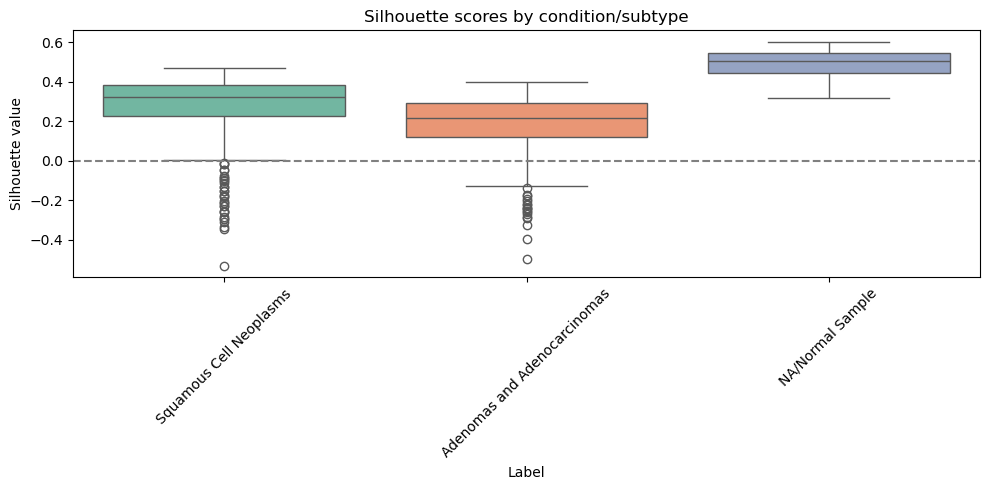

In [112]:
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]] 
    sil_values = silhouette_samples(X, labels)
    sil_df = pd.DataFrame({
    'silhouette': sil_values,
    'label': labels.values
    })
    plot_silhouette(sil_df)

## Comparison with random

In [183]:
all_genes = list(df.index)

In [184]:
num_rand_genes = len(all_cancer_to_cancer_sig_genes)

In [185]:
num_rand_genes

3518

In [186]:
rand_genes = set()
while len(rand_genes) < num_rand_genes:
    random_idx = random.randint(0, len(all_genes)-1)
    rand_genes.add(all_genes[random_idx])
len(rand_genes)

3518

In [187]:
df_rand = df.loc[list(rand_genes)].copy()

In [188]:
df_for_pca = df_rand.T
log_norm_df = np.log2(df_for_pca + 1)

In [189]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(log_norm_df)

# Put result in a DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
for key in columns_to_group_dict:
    pca_df[key] = list(sample_clinical[columns_to_group_dict[key]])

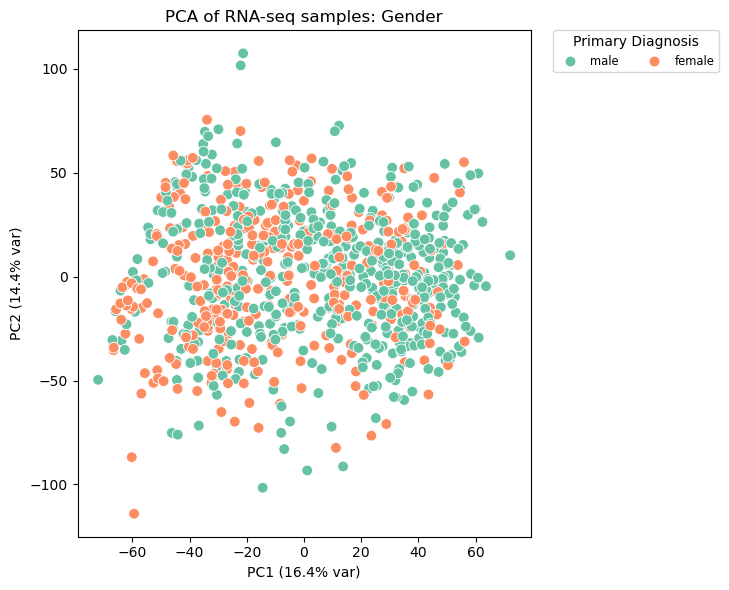

/var/folders/c4/570ty6gd42v42mmcqq8z2mrc0000gn/T/ipykernel_47294/761855078.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


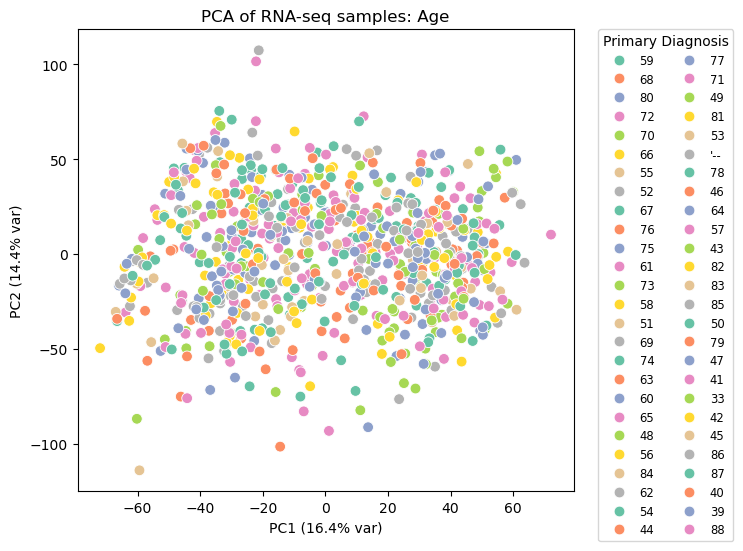

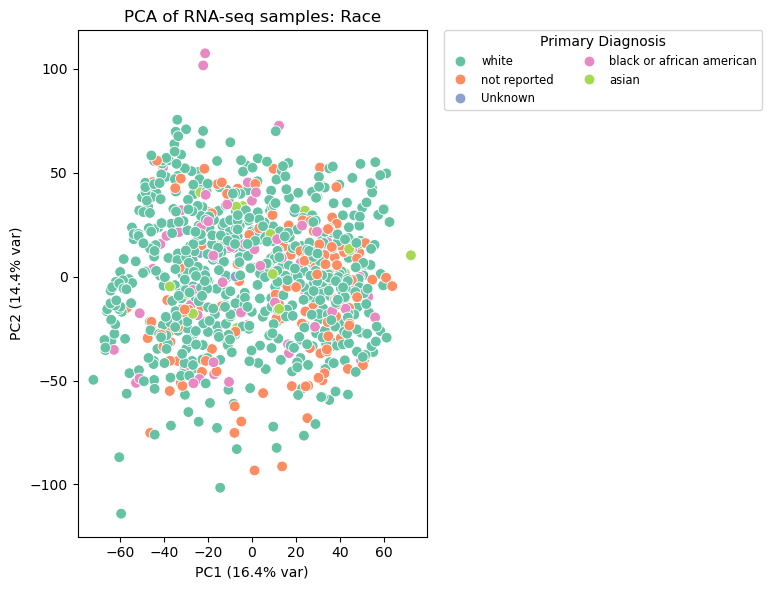

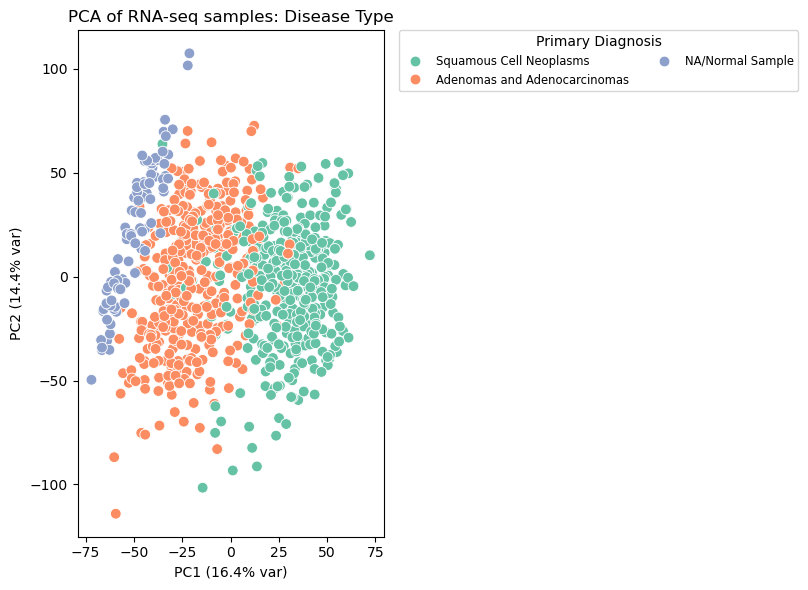

In [190]:
for key in columns_to_group_dict:
    save_pca_plot(pca_df, pca.explained_variance_ratio_, key,f"PCA of RNA-seq samples: {key}", f"pca_{columns_to_group_dict[key].replace(' ', '_')}.png", save = True)

In [191]:
X = PCA(n_components=10).fit_transform(log_norm_df)
#labels = sample_conditions 
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]]
    score = silhouette_score(X, labels)
    print(f"Silhouette Score of Labelling {key}: {score:.3f}")

Silhouette Score of Labelling Gender: 0.027
Silhouette Score of Labelling Age: -0.283
Silhouette Score of Labelling Race: -0.176
Silhouette Score of Labelling Disease Type: 0.208


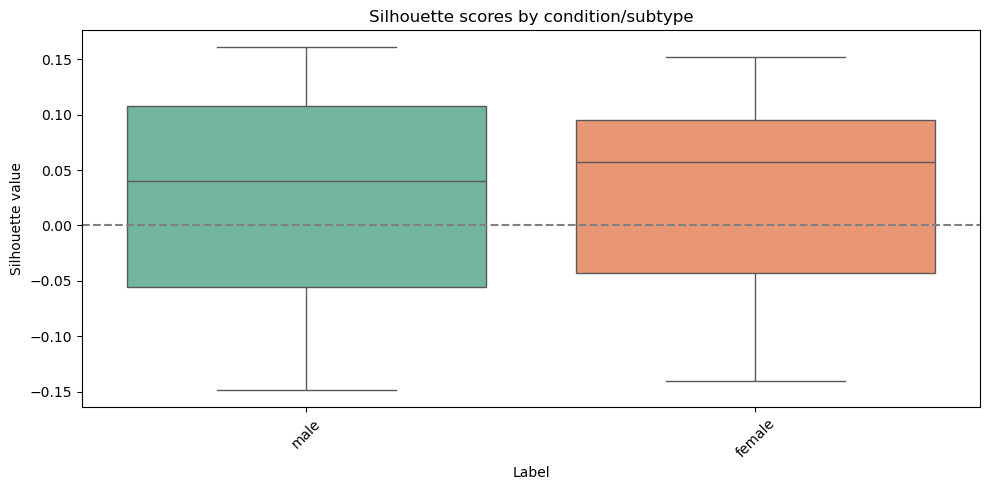

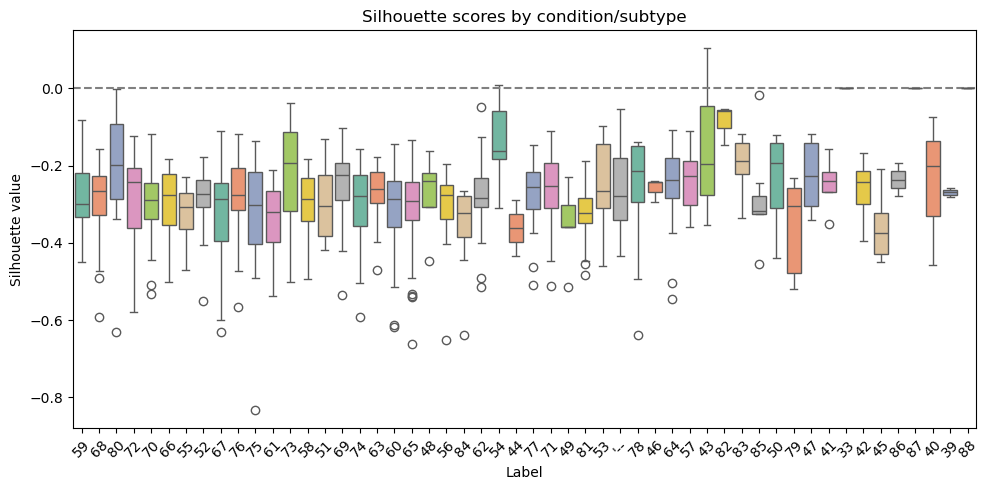

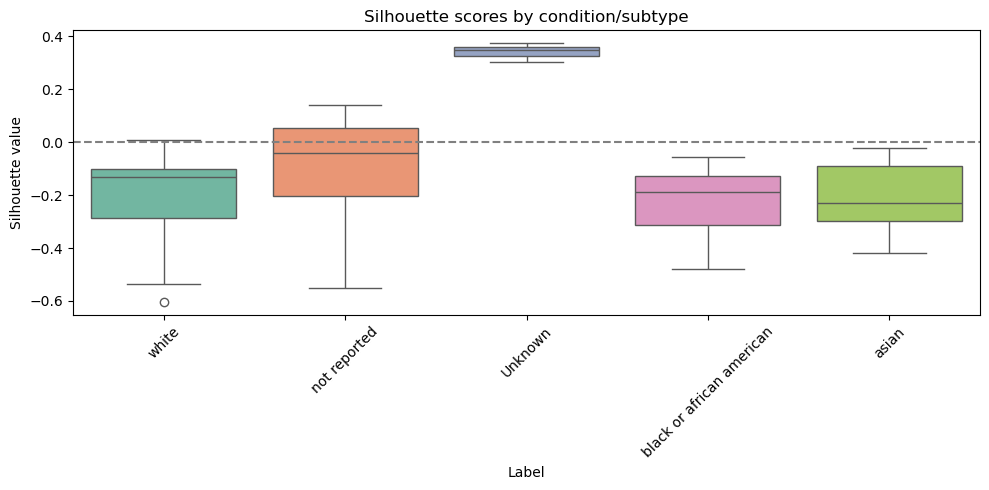

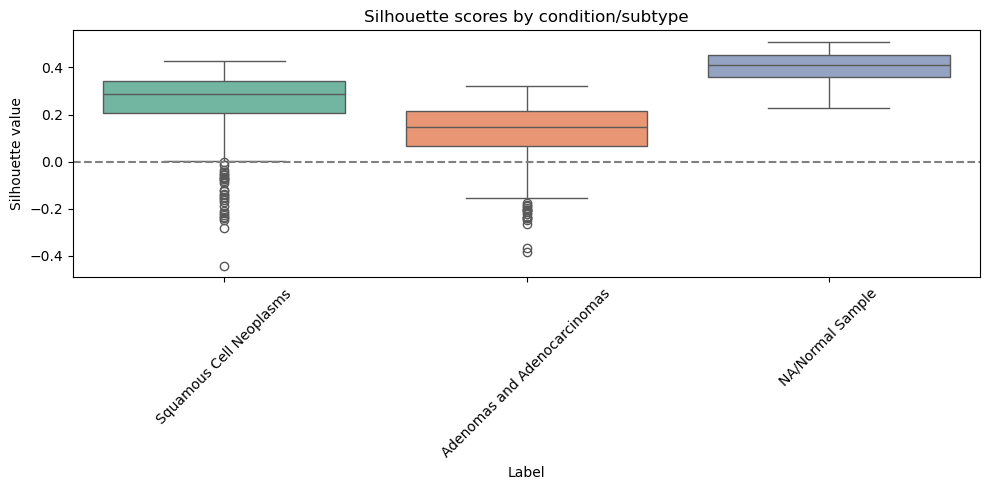

In [192]:
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]] 
    sil_values = silhouette_samples(X, labels)
    sil_df = pd.DataFrame({
    'silhouette': sil_values,
    'label': labels.values
    })
    plot_silhouette(sil_df)

In [194]:
sample_clinical

Case ID cases.submitter_id  \
Unnamed: 0                                                              
5faf8a12-a2aa-44f1-b099-02106766ec94  TCGA-NC-A5HJ       TCGA-NC-A5HJ   
6855a406-c085-45c7-b789-981786f0c775  TCGA-38-4629       TCGA-38-4629   
e2445ad6-2a6a-4ec3-84d8-93cc3c180a58  TCGA-22-1012       TCGA-22-1012   
4b167e70-e4e6-47f7-9fe9-11cf20f0d442  TCGA-39-5035       TCGA-39-5035   
470afda8-c4a4-4161-b6e7-1f0d2372d2c7  TCGA-85-8481       TCGA-85-8481   
...                                            ...                ...   
6c20a899-c806-46d0-b744-a26e53a9cb45  TCGA-55-6985       TCGA-55-6985   
c36f84e5-8c59-46fe-af32-7f70684383b2  TCGA-55-6971       TCGA-55-6971   
4c994cf9-52d0-4c05-97c0-fd2d3ffb9100  TCGA-43-3394       TCGA-43-3394   
94613d97-0a68-4212-beef-3c97a0b363ef  TCGA-50-5931       TCGA-50-5931   
d1f98c65-fd27-4893-a5c5-bc0bfe16ac5f  TCGA-56-7222       TCGA-56-7222   

                                     demographic.gender  \
Unnamed: 0                                                
5faf8a12-a2aa-44f1-b099-02106766ec94               male   
6855a406-c085-45c7-b789-981786f0c775               male   
e2445ad6-2a6a-4ec3-84d8-93cc3c180a58             female   
4b167e70-e4e6-47f7-9fe9-11cf20f0d442             female   
470afda8-c4a4-4161-b6e7-1f0d2372d2c7               male   
...                                                 ...   
6c20a899-c806-46d0-b744-a26e53a9cb45             female   
c36f84e5-8c59-46fe-af32-7f70684383b2             female   
4c994cf9-52d0-4c05-97c0-fd2d3ffb9100               male   
94613d97-0a68-4212-beef-3c97a0b363ef             female   
d1f98c65-fd27-4893-a5c5-bc0bfe16ac5f               male   

                                     demographic.age_at_index  \
Unnamed: 0                                                      
5faf8a12-a2aa-44f1-b099-02106766ec94                       59   
6855a406-c085-45c7-b789-981786f0c775                       68   
e2445ad6-2a6a-4ec3-84d8-93cc3c180a58                       80   
4b167e70-e4e6-47f7-9fe9-11cf20f0d442                       72   
470afda8-c4a4-4161-b6e7-1f0d2372d2c7                       70   
...                                                       ...   
6c20a899-c806-46d0-b744-a26e53a9cb45                       58   
c36f84e5-8c59-46fe-af32-7f70684383b2                       59   
4c994cf9-52d0-4c05-97c0-fd2d3ffb9100                       52   
94613d97-0a68-4212-beef-3c97a0b363ef                       75   
d1f98c65-fd27-4893-a5c5-bc0bfe16ac5f                       60   

                                               demographic.race  \
Unnamed: 0                                                        
5faf8a12-a2aa-44f1-b099-02106766ec94                      white   
6855a406-c085-45c7-b789-981786f0c775                      white   
e2445ad6-2a6a-4ec3-84d8-93cc3c180a58                      white   
4b167e70-e4e6-47f7-9fe9-11cf20f0d442                      white   
470afda8-c4a4-4161-b6e7-1f0d2372d2c7                      white   
...                                                         ...   
6c20a899-c806-46d0-b744-a26e53a9cb45                      white   
c36f84e5-8c59-46fe-af32-7f70684383b2                      white   
4c994cf9-52d0-4c05-97c0-fd2d3ffb9100  black or african american   
94613d97-0a68-4212-beef-3c97a0b363ef                      white   
d1f98c65-fd27-4893-a5c5-bc0bfe16ac5f                      white   

                                                cases.disease_type  \
Unnamed: 0                                                           
5faf8a12-a2aa-44f1-b099-02106766ec94       Squamous Cell Neoplasms   
6855a406-c085-45c7-b789-981786f0c775  Adenomas and Adenocarcinomas   
e2445ad6-2a6a-4ec3-84d8-93cc3c180a58       Squamous Cell Neoplasms   
4b167e70-e4e6-47f7-9fe9-11cf20f0d442       Squamous Cell Neoplasms   
470afda8-c4a4-4161-b6e7-1f0d2372d2c7       Squamous Cell Neoplasms   
...                                                            ...   
6c20a899-c806-46d0-b744-a26e53a9cb45           

In [249]:
gene_name_df = pd.read_csv("lung_gene_names.tsv", sep="\t", skiprows=1)

In [250]:
gene_name_df

gene_id   gene_name       gene_type  unstranded  \
0              N_unmapped         NaN             NaN     6004315   
1          N_multimapping         NaN             NaN    38166836   
2             N_noFeature         NaN             NaN    16553967   
3             N_ambiguous         NaN             NaN    16068400   
4      ENSG00000000003.15      TSPAN6  protein_coding        1821   
...                   ...         ...             ...         ...   
60659   ENSG00000288669.1  AC008763.4  protein_coding           0   
60660   ENSG00000288670.1  AL592295.6          lncRNA         114   
60661   ENSG00000288671.1  AC006486.3  protein_coding           0   
60662   ENSG00000288674.1  AL391628.1  protein_coding          13   
60663   ENSG00000288675.1  AP006621.6  protein_coding          13   

       stranded_first  stranded_second  tpm_unstranded  fpkm_unstranded  \
0             6004315          6004315             NaN              NaN   
1            38166836         38166836             NaN              NaN   
2            78083558         17008693             NaN              NaN   
3               89734         13953007             NaN              NaN   
4                   0             1821         10.3371          11.3818   
...               ...              ...             ...              ...   
60659               0                0          0.0000           0.0000   
60660               0              121          1.6245           1.7886   
60661               0                0          0.0000           0.0000   
60662               3               10          0.0348           0.0383   
60663              20               13          0.1992           0.2194   

       fpkm_uq_unstranded  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                 10.7364  
...                   ...  
60659              0.0000  
60660              1.6872  
60661              0.0000  
60662              0.0361  
60663              0.2069  

[60664 rows x 9 columns]

## Gene Id to Gene Name Conversion For GO

In [251]:
gene_ids = list(df.index)

In [252]:
valid_ids = [gid for gid in gene_ids if gid in gene_name_df.index]
gene_id_to_name = gene_name_df.loc[valid_ids, 'gene_name'].to_dict()

In [253]:
gene_ids

['ENSG00000000003.15',
 'ENSG00000000005.6',
 'ENSG00000000419.13',
 'ENSG00000000457.14',
 'ENSG00000000460.17',
 'ENSG00000000938.13',
 'ENSG00000000971.16',
 'ENSG00000001036.14',
 'ENSG00000001084.13',
 'ENSG00000001167.14',
 'ENSG00000001460.18',
 'ENSG00000001461.17',
 'ENSG00000001497.18',
 'ENSG00000001561.7',
 'ENSG00000001617.12',
 'ENSG00000001626.16',
 'ENSG00000001629.10',
 'ENSG00000001630.17',
 'ENSG00000001631.16',
 'ENSG00000002016.18',
 'ENSG00000002330.14',
 'ENSG00000002549.12',
 'ENSG00000002586.20',
 'ENSG00000002587.10',
 'ENSG00000002726.21',
 'ENSG00000002745.13',
 'ENSG00000002746.15',
 'ENSG00000002822.15',
 'ENSG00000002834.18',
 'ENSG00000002919.15',
 'ENSG00000002933.9',
 'ENSG00000003056.8',
 'ENSG00000003096.14',
 'ENSG00000003137.8',
 'ENSG00000003147.19',
 'ENSG00000003249.15',
 'ENSG00000003393.15',
 'ENSG00000003400.15',
 'ENSG00000003402.20',
 'ENSG00000003436.16',
 'ENSG00000003509.16',
 'ENSG00000003756.17',
 'ENSG00000003987.14',
 'ENSG0000000398

In [254]:
gene_name_df

gene_id   gene_name       gene_type  unstranded  \
0              N_unmapped         NaN             NaN     6004315   
1          N_multimapping         NaN             NaN    38166836   
2             N_noFeature         NaN             NaN    16553967   
3             N_ambiguous         NaN             NaN    16068400   
4      ENSG00000000003.15      TSPAN6  protein_coding        1821   
...                   ...         ...             ...         ...   
60659   ENSG00000288669.1  AC008763.4  protein_coding           0   
60660   ENSG00000288670.1  AL592295.6          lncRNA         114   
60661   ENSG00000288671.1  AC006486.3  protein_coding           0   
60662   ENSG00000288674.1  AL391628.1  protein_coding          13   
60663   ENSG00000288675.1  AP006621.6  protein_coding          13   

       stranded_first  stranded_second  tpm_unstranded  fpkm_unstranded  \
0             6004315          6004315             NaN              NaN   
1            38166836         38166836             NaN              NaN   
2            78083558         17008693             NaN              NaN   
3               89734         13953007             NaN              NaN   
4                   0             1821         10.3371          11.3818   
...               ...              ...             ...              ...   
60659               0                0          0.0000           0.0000   
60660               0              121          1.6245           1.7886   
60661               0                0          0.0000           0.0000   
60662               3               10          0.0348           0.0383   
60663              20               13          0.1992           0.2194   

       fpkm_uq_unstranded  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                 10.7364  
...                   ...  
60659              0.0000  
60660              1.6872  
60661              0.0000  
60662              0.0361  
60663              0.2069  

[60664 rows x 9 columns]

In [255]:
gene_id_to_name

{}

In [233]:
gene_name_df

# gene-model: GENCODE v36
gene_id           gene_name  gene_type      unstranded stranded_first stranded_second tpm_unstranded fpkm_unstranded        fpkm_uq_unstranded
N_unmapped        NaN        NaN            1961927    1961927        1961927         NaN            NaN                                   NaN
N_multimapping    NaN        NaN            4523899    4523899        4523899         NaN            NaN                                   NaN
N_noFeature       NaN        NaN            1806860    28155361       28076108        NaN            NaN                                   NaN
N_ambiguous       NaN        NaN            5809843    1435356        1439403         NaN            NaN                                   NaN
...                                                                                                                                        ...
ENSG00000288669.1 AC008763.4 protein_coding 1          1              0               0.0164         0.0052                             0.0058
ENSG00000288670.1 AL592295.6 lncRNA         109        54             57              3.9363         1.2500                             1.3989
ENSG00000288671.1 AC006486.3 protein_coding 0          0              0               0.0000         0.0000                             0.0000
ENSG00000288674.1 AL391628.1 protein_coding 9          7              2               0.0611         0.0194                             0.0217
ENSG00000288675.1 AP006621.6 protein_coding 15         14             19              0.5826         0.1850                             0.2071

[60665 rows x 1 columns]

In [256]:
import mygene

mg = mygene.MyGeneInfo()
# Remove version numbers if needed
gene_ids = [gid.split('.')[0] for gid in gene_ids]

# Query mygene.info
results = mg.querymany(gene_ids, scopes='ensembl.gene', fields='symbol', species='human')

# Build dictionary
id_to_name = {entry['query']: entry.get('symbol', None) for entry in results}


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
1 input query terms found dup hits:	[('ENSG00000215156', 2)]
2 input query terms found no hit:	['ENSG00000168078', 'ENSG00000189144']


In [257]:
id_to_name

{'ENSG00000000003': 'TSPAN6',
 'ENSG00000000005': 'TNMD',
 'ENSG00000000419': 'DPM1',
 'ENSG00000000457': 'SCYL3',
 'ENSG00000000460': 'FIRRM',
 'ENSG00000000938': 'FGR',
 'ENSG00000000971': 'CFH',
 'ENSG00000001036': 'FUCA2',
 'ENSG00000001084': 'GCLC',
 'ENSG00000001167': 'NFYA',
 'ENSG00000001460': 'STPG1',
 'ENSG00000001461': 'NIPAL3',
 'ENSG00000001497': 'LAS1L',
 'ENSG00000001561': 'ENPP4',
 'ENSG00000001617': 'SEMA3F',
 'ENSG00000001626': 'CFTR',
 'ENSG00000001629': 'ANKIB1',
 'ENSG00000001630': 'CYP51A1',
 'ENSG00000001631': 'KRIT1',
 'ENSG00000002016': 'RAD52',
 'ENSG00000002330': 'BAD',
 'ENSG00000002549': 'LAP3',
 'ENSG00000002586': 'CD99',
 'ENSG00000002587': 'HS3ST1',
 'ENSG00000002726': 'AOC1',
 'ENSG00000002745': 'WNT16',
 'ENSG00000002746': 'HECW1',
 'ENSG00000002822': 'MAD1L1',
 'ENSG00000002834': 'LASP1',
 'ENSG00000002919': 'SNX11',
 'ENSG00000002933': 'TMEM176A',
 'ENSG00000003056': 'M6PR',
 'ENSG00000003096': 'KLHL13',
 'ENSG00000003137': 'CYP26B1',
 'ENSG000000031

In [258]:
sig_gene_ids = list(df_intersection.index)

In [259]:
mg = mygene.MyGeneInfo()
# Remove version numbers if needed
sig_gene_ids = [gid.split('.')[0] for gid in sig_gene_ids]

# Query mygene.info
results = mg.querymany(sig_gene_ids, scopes='ensembl.gene', fields='symbol', species='human')

# Build dictionary
id_to_name = {entry['query']: entry.get('symbol', None) for entry in results}


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


In [263]:
genes =list(id_to_name.values())

In [268]:
len(genes)

3149

In [292]:
df = pd.DataFrame(list(id_to_name.items()), columns=['id', 'name'])

In [298]:
df = df[~df["name"].isna()]

In [301]:
df.to_csv("id_to_name_lung_genes.csv")

In [269]:
len(clean_list)

3123

In [267]:
clean_list = [x for x in genes if not pd.isna(x)]
print(clean_list)

['GJB3', 'HHIP', 'PRODH2', 'IQCD', 'HRCT1', 'ZNF729', 'TMPRSS11A', 'RETN', 'CCDC190', 'RFX6', 'KCNA3', 'FRG2B', 'CDK6', 'PLA2G12B', 'ENTREP1', 'UPK3A', 'HKDC1', 'CCDC187', 'NR1I2', 'LMO7', 'CCDC197', 'MYH1', 'MGARP', 'CFAP299', 'VWA7', 'TRIM34', 'ARSF', 'PARPBP', 'RAB6B', 'NDNF', 'OTOS', 'GMPS', 'PNCK', 'COL4A3', 'KRTAP17-1', 'TRPM1', 'POTEM', 'TNNC2', 'CFAP54', 'NLRP13', 'LELP1', 'GLI1', 'SLC6A2', 'FCN1', 'LRP4', 'CRACDL', 'ODAPH', 'TRH', 'RAB37', 'NLRP8', 'NDUFA4L2', 'TP53TG3D', 'TENM4', 'FERMT1', 'ACSM3', 'MRGPRE', 'TMED6', 'CIT', 'CALML5', 'ORM1', 'GSTM3', 'OR7A5', 'DCAF4L2', 'HTN3', 'ABCC1', 'RHPN1', 'TNXB', 'ZNF728', 'HNMT', 'KRT222', 'LCE3E', 'CALCR', 'KIF23', 'GABRA3', 'CFHR4', 'TSPY9', 'PSG1', 'BCL2L15', 'SCD5', 'SEMA3D', 'LPCAT1', 'ANG', 'SLC7A9', 'ITPKA', 'ARX', 'VWC2L', 'KRT23', 'TPX2', 'STEAP4', 'SERPINI1', 'TTLL12', 'KLHL13', 'TRIM16', 'MAGEB6', 'ALOX12B', 'SLC39A8', 'MMP10', 'PPIF', 'MMP24', 'FGL1', 'CHAD', 'CDCA5', 'CNTN1', 'GMNC', 'PCDH19', 'MACROD2', 'H3C15', 'DNM3', 

In [ ]:
with open('Datasets/LungSigGenes/cancer_to_normal_comparison_sig_genes.txt', 'w') as f:
    for item in clean_list:
        f.write(f"{item}\n")

## Misc analysis

In [270]:
import gseapy as gp

# GO Biological Process
enr = gp.enrichr(gene_list=clean_list,
                 gene_sets=['GO_Biological_Process_2021', 'KEGG_2021_Human'],
                 organism='Human',
                 outdir='enrichment_results',
                 cutoff=0.05)

In [272]:
enr.results.head(10)

Gene_set  \
0  GO_Biological_Process_2021   
1  GO_Biological_Process_2021   
2  GO_Biological_Process_2021   
3  GO_Biological_Process_2021   
4  GO_Biological_Process_2021   
5  GO_Biological_Process_2021   
6  GO_Biological_Process_2021   
7  GO_Biological_Process_2021   
8  GO_Biological_Process_2021   
9  GO_Biological_Process_2021   

                                                Term Overlap       P-value  \
0                 epidermis development (GO:0008544)   51/83  2.654047e-21   
1                      skin development (GO:0043588)   42/80  2.072012e-14   
2          keratinocyte differentiation (GO:0030216)   26/41  5.507630e-12   
3        epidermal cell differentiation (GO:0009913)   29/53  5.827346e-11   
4  cell-cell adhesion via plasma-membrane adhesio...  57/170  5.170071e-09   
5        chemical synaptic transmission (GO:0007268)  87/306  7.185761e-09   
6                       cilium movement (GO:0003341)   26/52  7.339143e-09   
7                 generation of neurons (GO:0048699)  64/202  7.823107e-09   
8  anterograde trans-synaptic signaling (GO:0098916)  73/244  1.133708e-08   
9                neuron differentiation (GO:0030182)  57/174  1.339686e-08   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0      1.265715e-17            0                     0    8.742531   
1      4.940713e-11            0                     0    6.043062   
2      8.755295e-09            0                     0    9.440956   
3      6.947653e-08            0                     0    6.584303   
4      4.663550e-06            0                     0    2.759113   
5      4.663550e-06            0                     0    2.180547   
6      4.663550e-06            0                     0    5.443152   
7      4.663550e-06            0                     0    2.538744   
8      6.007393e-06            0                     0    2.339202   
9      6.388964e-06            0                     0    2.664149   

   Combined Score                                              Genes  
0      414.205389  CALML5;BNC1;LAMC2;GLI1;EDA2R;CASP14;STS;TGM5;C...  
1      190.402816  FLG;SPRR2F;SPRR3;ASAH1;CSTA;SPRR2G;ASCL4;ITGB4...  
2      244.755717  FLG;SPRR2F;SPRR3;ASAH1;CSTA;SPRR2G;TGM1;SCEL;S...  
3      155.164864  FLG;SPRR2F;SPRR3;ASAH1;CSTA;SPRR2G;GLI1;TGM1;S...  
4       52.644923  PTPRT;TENM1;TENM2;TENM4;PCDHGB4;LRRC4;CLDN2;CE...  
5       40.887788  GABRB2;CHRM3;GABRB1;OR11H4;HTR2B;HTR2C;HTR4;SL...  
6      101.950483  ODAD1;SPEF1;DNAH7;ODAD4;DNAH5;DNAH9;TTC29;TEKT...  
7       47.388657  BTG4;NRP1;WNT2B;PCSK9;OTP;FZD10;FGF8;HEY1;SIX3...  
8       42.796145  GABRB2;CHRM3;GABRB1;OR11H4;HTR2B;HTR2C;HTR4;SL...  
9       48.296339  BTG4;TENM1;TENM2;WNT2B;TENM4;PCSK9;OTP;FZD10;H...

In [273]:
enr.results.to_csv("enrichr_GO_results.csv", index=False)


/var/folders/c4/570ty6gd42v42mmcqq8z2mrc0000gn/T/ipykernel_47294/2931913588.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


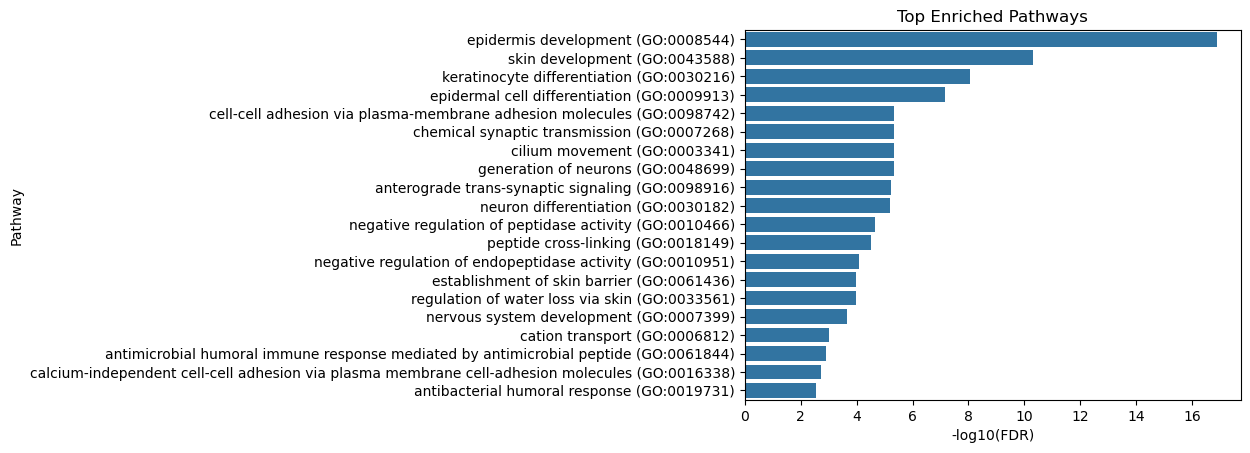

In [275]:
import seaborn as sns
import matplotlib.pyplot as plt

top = enr.results.head(20)
sns.barplot(y=top['Term'], x=-np.log10(top['Adjusted P-value']))
plt.title("Top Enriched Pathways")
plt.xlabel("-log10(FDR)")
plt.ylabel("Pathway")
plt.tight_layout()
plt.show()

In [337]:
path = "DeSeq2Local/results/DiseaseType_Subset_Lung/CancerSTtoST/squamous_cell_neoplasms_vs_adenomas_and_adenocarcinomas/sig_genes.csv"

In [338]:
sig_genes_info = pd.read_csv(path)

In [339]:
sig_genes_info

Unnamed: 0      baseMean  log2FoldChange     lfcSE    pvalue  \
0     ENSG00000073282.14  13575.695052       -4.916965  0.130189  0.000000   
1      ENSG00000094796.5    446.430085       -5.995342  0.209455  0.000000   
2     ENSG00000110400.11  14787.796794       -3.215693  0.078794  0.000000   
3     ENSG00000114948.13   2964.990929       -5.355335  0.130170  0.000000   
4      ENSG00000121552.4   5638.927976       -4.371501  0.112297  0.000000   
...                  ...           ...             ...       ...       ...   
3513   ENSG00000102891.4      0.370380       -9.419681  0.905005  0.034498   
3514   ENSG00000196341.3      2.654889       -1.136429  0.333924  0.034613   
3515   ENSG00000196224.7      0.300309       -2.617375  0.588778  0.035118   
3516   ENSG00000141750.7     42.948518       -1.165712  0.125298  0.036372   
3517  ENSG00000151812.15      3.338860        1.149447  0.159691  0.037402   

          padj  
0     0.000000  
1     0.000000  
2     0.000000  
3     0.000000  
4     0.000000  
...        ...  
3513  0.044980  
3514  0.045120  
3515  0.045743  
3516  0.047316  
3517  0.048595  

[3518 rows x 6 columns]

In [340]:
sig_genes_info.index = sig_genes_info['Unnamed: 0']

In [341]:
sig_genes_info

Unnamed: 0      baseMean  log2FoldChange  \
Unnamed: 0                                                             
ENSG00000073282.14  ENSG00000073282.14  13575.695052       -4.916965   
ENSG00000094796.5    ENSG00000094796.5    446.430085       -5.995342   
ENSG00000110400.11  ENSG00000110400.11  14787.796794       -3.215693   
ENSG00000114948.13  ENSG00000114948.13   2964.990929       -5.355335   
ENSG00000121552.4    ENSG00000121552.4   5638.927976       -4.371501   
...                                ...           ...             ...   
ENSG00000102891.4    ENSG00000102891.4      0.370380       -9.419681   
ENSG00000196341.3    ENSG00000196341.3      2.654889       -1.136429   
ENSG00000196224.7    ENSG00000196224.7      0.300309       -2.617375   
ENSG00000141750.7    ENSG00000141750.7     42.948518       -1.165712   
ENSG00000151812.15  ENSG00000151812.15      3.338860        1.149447   

                       lfcSE    pvalue      padj  
Unnamed: 0                                        
ENSG00000073282.14  0.130189  0.000000  0.000000  
ENSG00000094796.5   0.209455  0.000000  0.000000  
ENSG00000110400.11  0.078794  0.000000  0.000000  
ENSG00000114948.13  0.130170  0.000000  0.000000  
ENSG00000121552.4   0.112297  0.000000  0.000000  
...                      ...       ...       ...  
ENSG00000102891.4   0.905005  0.034498  0.044980  
ENSG00000196341.3   0.333924  0.034613  0.045120  
ENSG00000196224.7   0.588778  0.035118  0.045743  
ENSG00000141750.7   0.125298  0.036372  0.047316  
ENSG00000151812.15  0.159691  0.037402  0.048595  

[3518 rows x 6 columns]

In [342]:
sig_genes_info.loc["ENSG00000063660.9"].log2FoldChange

np.float64(-2.84975051737269)

In [343]:
upregulated_intersection = []
downregulated_intersection = []
for gene_id in intersection_sig_genes:
    info = sig_genes_info.loc[gene_id]
    if info.log2FoldChange > 0:
        upregulated_intersection.append(gene_id)
    else:
        downregulated_intersection.append(gene_id)

In [345]:
len(upregulated_intersection) ## Associated with LUSC

1595

In [346]:
len(downregulated_intersection) ## Associated with LUAD

1554

In [347]:
mg = mygene.MyGeneInfo()
# Remove version numbers if needed
gene_ids = [gid.split('.')[0] for gid in upregulated_intersection]

# Query mygene.info
results = mg.querymany(gene_ids, scopes='ensembl.gene', fields='symbol', species='human')

# Build dictionary
id_to_name_upregulated = {entry['query']: entry.get('symbol', None) for entry in results}

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


In [349]:
id_to_name_upregulated

1595

In [350]:
mg = mygene.MyGeneInfo()
# Remove version numbers if needed
gene_ids = [gid.split('.')[0] for gid in downregulated_intersection]

# Query mygene.info
results = mg.querymany(gene_ids, scopes='ensembl.gene', fields='symbol', species='human')

# Build dictionary
id_to_name_downregulated = {entry['query']: entry.get('symbol', None) for entry in results}

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


In [352]:
id_to_name_downregulated

1554

In [353]:
df = pd.DataFrame(list(id_to_name_upregulated.items()), columns=['id', 'name'])
df = df[~df["name"].isna()]
df.to_csv("id_to_name_lung_upregulated_genes.csv")
df

id     name
0     ENSG00000164161     HHIP
1     ENSG00000250799   PRODH2
2     ENSG00000166578     IQCD
3     ENSG00000196196    HRCT1
4     ENSG00000196350   ZNF729
...               ...      ...
1590  ENSG00000106992      AK1
1591  ENSG00000142025   DMRTC2
1592  ENSG00000253953  PCDHGB4
1593  ENSG00000181903    OR4C6
1594  ENSG00000164197   RNF180

[1574 rows x 2 columns]

In [354]:
df = pd.DataFrame(list(id_to_name_downregulated.items()), columns=['id', 'name'])
df = df[~df["name"].isna()]
df.to_csv("id_to_name_lung_downregulated_genes.csv")
df

id       name
0     ENSG00000188910       GJB3
1     ENSG00000187054  TMPRSS11A
2     ENSG00000185860    CCDC190
3     ENSG00000225899      FRG2B
4     ENSG00000105810       CDK6
...               ...        ...
1549  ENSG00000163975      MELTF
1550  ENSG00000114331      ACAP2
1551  ENSG00000188883      KLRG2
1552  ENSG00000162723     SLAMF9
1553  ENSG00000155897      ADCY8

[1549 rows x 2 columns]

In [1]:
overlap = set(list(id_to_name_upregulated.values())) & set(list(id_to_name_downregulated.values()))

if overlap:
    print(f"{len(overlap)} gene(s) appear in both lists:")
    print(overlap)
else:
    print("No overlap — the two lists are cleanly separated.")

NameError: name 'id_to_name_upregulated' is not defined